In [432]:
# clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [92]:
regression_B_link = 'regression_data/inc_analysis_regression_1/Data for Regression B-Table 1.csv'


In [93]:
df_clusters = pd.read_csv(regression_B_link).reset_index()
df_clusters.columns = df_clusters.iloc[0].values

In [94]:
df_clusters = df_clusters.iloc[1:]

In [116]:
df_clusters.head()

InclusionDistanceAvg InclusionDistanceStdDev Cluster Epoch NoOfCommittees  \
1               26.875             3.782387026      C2  5005            256   
2               26.625             4.513420847      C2  5006            256   
3             29.34375             3.694890762      C2  5007            256   
4              27.8125             3.880783925      C2  5008            256   
5             28.90625             3.062355987      C2  5009            256   

  AttesterSlashings VoluntaryExits MissingBlocks AttesterSlashings-t-1  \
1                 0              0             7                     0   
2                 0              0            10                     0   
3                 0              0            12                     0   
4                 0              0            10                     0   
5                 0              0            10                     0   

  VoluntaryExits-t-1  ... MissingBlocks-t-2 AttesterSlashings-t-3  \
1                  0  ...                12                     0   
2                  0  ...                 8                     0   
3                  0  ...                 7                     0   
4                  0  ...                10                     0   
5                  0  ...                12                     0   

  VoluntaryExits-t-3 MissingBlocks-t-3 AttesterSlashings-t-4  \
1                  0                12                     0   
2                  0                12                     0   
3                  0                 8                     0   
4                  0                 7                     0   
5                  0                10                     0   

  VoluntaryExits-t-4 MissingBlocks-t-4 AttesterSlashings-t-5  \
1                  0                 8                     0   
2                  0                12                     0   
3                  0                12                     0   
4                  0                 8                     0   
5                  0                 7                     0   

  VoluntaryExits-t-5 MissingBlocks-t-5  
1                  0                 8  
2                  0                 8  
3                  0                12  
4                  0                12  
5                  0                 8  

[5 rows x 23 columns]

In [445]:
df_clusters['Epoch'] = pd.to_numeric(df_clusters['Epoch'])

In [447]:
df_clusters['Epoch'].describe()

count     7143.000000
mean      8576.000000
std       2062.150819
min       5005.000000
25%       6790.500000
50%       8576.000000
75%      10361.500000
max      12147.000000
Name: Epoch, dtype: float64

In [96]:
df_final = df_clusters[['InclusionDistanceAvg','InclusionDistanceStdDev','NoOfCommittees','AttesterSlashings', 'VoluntaryExits', 'MissingBlocks']]

In [97]:
df_final.head()

InclusionDistanceAvg InclusionDistanceStdDev NoOfCommittees  \
1               26.875             3.782387026            256   
2               26.625             4.513420847            256   
3             29.34375             3.694890762            256   
4              27.8125             3.880783925            256   
5             28.90625             3.062355987            256   

  AttesterSlashings VoluntaryExits MissingBlocks  
1                 0              0             7  
2                 0              0            10  
3                 0              0            12  
4                 0              0            10  
5                 0              0            10

In [98]:
k = 5
k_means = KMeans(n_clusters=k)

In [99]:
k_means_fit = k_means.fit(df_final)

In [100]:
pd.DataFrame(k_means_fit.fit_predict(df_final))

0
0     2
1     2
2     2
3     2
4     2
...  ..
7138  4
7139  4
7140  4
7141  4
7142  2

[7143 rows x 1 columns]

In [101]:
silhouette_score(df_final,k_means_fit.fit_predict(df_final))

0.6449778138066845

In [289]:
r = {
    'k': [],
    'silhouette_score': []
}

for k in range(3, 30):
    k_means = KMeans(n_clusters=k) 
    k_means_fit = k_means.fit(df_final)
    r['k'].append(k)
    r['silhouette_score'].append(silhouette_score(df_final,k_means_fit.fit_predict(df_final)))
    
    print("Fitted ", k)

Fitted  3
Fitted  4
Fitted  5
Fitted  6
Fitted  7
Fitted  8
Fitted  9
Fitted  10
Fitted  11
Fitted  12
Fitted  13
Fitted  14
Fitted  15
Fitted  16
Fitted  17
Fitted  18
Fitted  19
Fitted  20
Fitted  21
Fitted  22
Fitted  23
Fitted  24
Fitted  25
Fitted  26
Fitted  27
Fitted  28
Fitted  29


In [427]:
r

0             1             2             3             4  \
0  1.000000e+00  5.633329e-01  1.786142e-15  1.588939e-02  2.317615e-01   
1  5.633329e-01  1.000000e+00  5.905219e-09  1.000000e+00  4.038892e-05   
2  1.786142e-15  5.905219e-09  1.000000e+00  3.990906e-06  3.260306e-25   
3  1.588939e-02  1.000000e+00  3.990906e-06  1.000000e+00  7.550611e-08   
4  2.317615e-01  4.038892e-05  3.260306e-25  7.550611e-08  1.000000e+00   
5  3.055948e-02  1.307735e-06  3.697313e-28  1.184910e-09  1.000000e+00   
6  1.543623e-03  1.000000e+00  1.012276e-04  1.000000e+00  2.063077e-09   

              5             6  
0  3.055948e-02  1.543623e-03  
1  1.307735e-06  1.000000e+00  
2  3.697313e-28  1.012276e-04  
3  1.184910e-09  1.000000e+00  
4  1.000000e+00  2.063077e-09  
5  1.000000e+00  2.348468e-11  
6  2.348468e-11  1.000000e+00

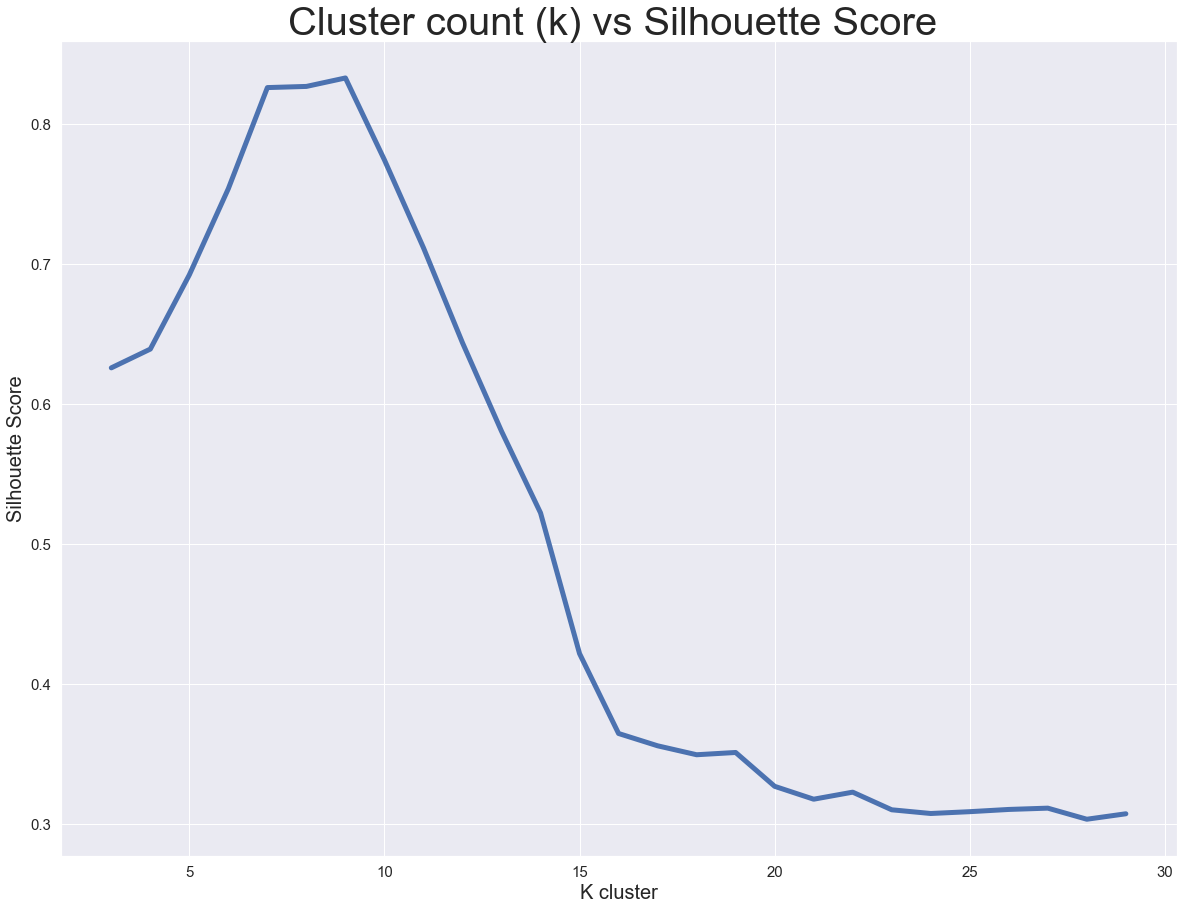

In [292]:
plt.figure(figsize=(20,15), )
cluster_scores = sns.lineplot(x=r['k'], y= r['silhouette_score'], linewidth = 5)
cluster_scores.axes.set_title("Cluster count (k) vs Silhouette Score ",fontsize=40)
cluster_scores.set_xlabel("K cluster",fontsize=20)
cluster_scores.set_ylabel("Silhouette Score",fontsize=20)
cluster_scores.tick_params(labelsize=15)
plt.savefig('cluster_scores_per_k.png')

In [105]:
r['silhouette_score']

[0.6256661429337039,
 0.6390691517962414,
 0.6920747182244511,
 0.7536393082219609,
 0.8257589175062543,
 0.8265823959914539,
 0.8326246614450671,
 0.774807544694714,
 0.7057761776707536,
 0.6477942741728239,
 0.5703401664958195,
 0.5087912939048966,
 0.42135348189272137,
 0.4181730869113912,
 0.3511231582400592,
 0.349618866315711,
 0.3445744012196581,
 0.32165255589997055,
 0.3210595556388046,
 0.3241353318859474,
 0.31487638976484184,
 0.31341380139291225,
 0.30378211846839887,
 0.3114911320404254,
 0.30902657280342083,
 0.30758765311812125,
 0.3084788765273082]

In [48]:
r['k']

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [350]:
# optimal number of clusters is 9

k_means = KMeans(n_clusters=9, random_state=42) 
k_means_fit = k_means.fit(df_final)


In [351]:
k_means_fit.labels_

array([2, 2, 2, ..., 7, 7, 8], dtype=int32)

In [352]:
df_labeled = df_final
df_labeled['clusters'] = k_means_fit.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [353]:
df_labeled.head()

InclusionDistanceAvg InclusionDistanceStdDev NoOfCommittees  \
1               26.875             3.782387026            256   
2               26.625             4.513420847            256   
3             29.34375             3.694890762            256   
4              27.8125             3.880783925            256   
5             28.90625             3.062355987            256   

  AttesterSlashings VoluntaryExits MissingBlocks  clusters  
1                 0              0             7         2  
2                 0              0            10         2  
3                 0              0            12         2  
4                 0              0            10         2  
5                 0              0            10         2

In [354]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7143 entries, 1 to 7143
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   InclusionDistanceAvg     7143 non-null   object
 1   InclusionDistanceStdDev  7143 non-null   object
 2   NoOfCommittees           7143 non-null   object
 3   AttesterSlashings        7143 non-null   object
 4   VoluntaryExits           7143 non-null   object
 5   MissingBlocks            7143 non-null   object
 6   clusters                 7143 non-null   int32 
dtypes: int32(1), object(6)
memory usage: 362.9+ KB


In [356]:
mask = (df_labeled['clusters'] != 8) & (df_labeled['clusters'] != 7)

In [357]:
df_labeled = df_labeled[mask]

In [358]:
df_labeled

InclusionDistanceAvg InclusionDistanceStdDev NoOfCommittees  \
1                  26.875             3.782387026            256   
2                  26.625             4.513420847            256   
3                29.34375             3.694890762            256   
4                 27.8125             3.880783925            256   
5                28.90625             3.062355987            256   
...                   ...                     ...            ...   
7100               24.625             6.499379623            448   
7101             23.71875             6.706926487            448   
7102             20.84375             7.135144165            448   
7103               24.625             6.020127531            448   
7104              23.9375             5.836136039            448   

     AttesterSlashings VoluntaryExits MissingBlocks  clusters  
1                    0              0             7         2  
2                    0              0            10         2  
3                    0              0            12         2  
4                    0              0            10         2  
5                    0              0            10         2  
...                ...            ...           ...       ...  
7100                 0              0             6         1  
7101                 0              0             8         1  
7102                 0              0             5         1  
7103                 0              0             5         1  
7104                 0              0             8         1  

[7104 rows x 7 columns]

In [359]:
df_labeled['clusters'].value_counts()

1    1081
3    1068
0    1051
5    1037
4    1029
6    1025
2     813
Name: clusters, dtype: int64

In [430]:
# Removed clusters 8 and 9 because there was < 30.
df_labeled['clusters'] = df_labeled['clusters'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [434]:
df_labeled.head()

InclusionDistanceAvg InclusionDistanceStdDev NoOfCommittees  \
1               26.875             3.782387026            256   
2               26.625             4.513420847            256   
3             29.34375             3.694890762            256   
4              27.8125             3.880783925            256   
5             28.90625             3.062355987            256   

  AttesterSlashings VoluntaryExits MissingBlocks clusters  
1                 0              0             7        2  
2                 0              0            10        2  
3                 0              0            12        2  
4                 0              0            10        2  
5                 0              0            10        2

In [448]:
import plotly.express as px
import plotly.offline as pyo

pyo.init_notebook_mode()
    
fig = (px.scatter_3d(df_labeled, x='InclusionDistanceAvg', y='InclusionDistanceStdDev', z='MissingBlocks', 
              color='clusters', size_max=10, opacity=.3))

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.write_html("inc_distance_plotplot.html")

In [437]:
df_labeled.columns

Index(['InclusionDistanceAvg', 'InclusionDistanceStdDev', 'NoOfCommittees',
       'AttesterSlashings', 'VoluntaryExits', 'MissingBlocks', 'clusters'],
      dtype='object')

In [386]:
# Computing Dunn test results for all of the following

# InclusionDistanceAvg vs clusters
# InclusionDistanceStdDev vs clusters
# NoOfCommittees vs clusters
# AttesterSlashings vs clusters
# VoluntaryExits vs clusters
# MissingBlocks vs clusters

df_inc_dist_avg = df_labeled[['InclusionDistanceAvg', 'clusters']]
df_inc_dist_stdev = df_labeled[['InclusionDistanceStdDev', 'clusters']]
# df_num_committees = df_labeled[['NoOfCommittees', 'clusters']]
df_att_slashings = df_labeled[['AttesterSlashings', 'clusters']]
df_vol_exits = df_labeled[['VoluntaryExits', 'clusters']]
df_missing_blocks = df_labeled[['MissingBlocks', 'clusters']]

dfs = [df_inc_dist_avg, df_inc_dist_stdev, df_att_slashings, df_vol_exits, df_missing_blocks]

In [387]:
# make sure leading column is numeric

for i in range(5):
    dfs[i][dfs[i].columns[0]] = pd.to_numeric(dfs[i][dfs[i].columns[0]])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [388]:
dunn_test_results_raw = []

for df in dfs:
    cols = df.columns
    dunn_test_results_raw.append(sp.posthoc_dunn(df, val_col=cols[0], group_col=cols[1], p_adjust = 'bonferroni'))


In [389]:
len(dunn_test_results_raw)

5

In [390]:
dunn_test_results_modified = []

for i, r in enumerate(dunn_test_results_raw):
    dunn_test_results_modified.append({ element: [] for element in r.columns })
    for column in r.columns:
        for item in r[column]:
            if item <= 0.01:
                dunn_test_results_modified[i][column].append(1)
            else:
                dunn_test_results_modified[i][column].append(0)

In [391]:
dunn_test_results_modified_dfs = [ pd.DataFrame(df) for df in dunn_test_results_modified ]

In [392]:
dunn_test_results_modified_dfs[0]

0  1  2  3  4  5  6
0  0  1  1  0  1  1  0
1  1  0  1  0  0  1  1
2  1  1  0  1  1  1  1
3  0  0  1  0  0  1  1
4  1  0  1  0  0  1  1
5  1  1  1  1  1  0  1
6  0  1  1  1  1  1  0

In [393]:
# Saving output dfs
for i in range(5):
    pd.DataFrame(dunn_test_results_modified_dfs[i], index=dunn_test_results_modified_dfs[i].columns).to_csv(f'dunn_test_clusters_output_{dfs[i].columns[0]}.csv')

In [394]:
df_labeled.head()

InclusionDistanceAvg InclusionDistanceStdDev NoOfCommittees  \
1               26.875             3.782387026            256   
2               26.625             4.513420847            256   
3             29.34375             3.694890762            256   
4              27.8125             3.880783925            256   
5             28.90625             3.062355987            256   

  AttesterSlashings VoluntaryExits MissingBlocks  clusters  
1                 0              0             7         2  
2                 0              0            10         2  
3                 0              0            12         2  
4                 0              0            10         2  
5                 0              0            10         2

In [395]:
median_per_cluster_dfs = [] 
for df in dfs:
    median_per_cluster_dfs.append(df.groupby('clusters')
                                          .median()
                                          .reset_index()
                                          .sort_values(df.columns[1], ascending=False))

In [396]:
avgs_per_cluster_dfs = [] 
for df in dfs:
    avgs_per_cluster_dfs.append(df.groupby('clusters')
                                        .mean()
                                        .reset_index()
                                        .sort_values(df.columns[1], ascending=False))

In [397]:
stdev_per_cluster_dfs = [] 
for df in dfs:
    stdev_per_cluster_dfs.append(df.groupby('clusters')
                                         .std()
                                         .reset_index()
                                         .sort_values(df.columns[1], ascending=False))
    

In [398]:
for df in median_per_cluster_dfs:
    df.sort_values(df.columns[1], ascending=False, inplace=True)
    
for df in avgs_per_cluster_dfs:
    df.sort_values(df.columns[1], ascending=False, inplace=True)
    
for df in stdev_per_cluster_dfs:
    df.sort_values(df.columns[1], ascending=False, inplace=True)

In [399]:
median_per_cluster_dfs

[   clusters  InclusionDistanceAvg
 2         2             27.593750
 5         5             26.187500
 4         4             23.625000
 1         1             23.500000
 3         3             23.265625
 0         0             22.750000
 6         6             22.687500,
    clusters  InclusionDistanceStdDev
 0         0                 7.229462
 6         6                 7.206628
 4         4                 6.728610
 3         3                 6.611863
 1         1                 6.082431
 5         5                 5.245197
 2         2                 4.433992,
    clusters  AttesterSlashings
 6         6                  0
 5         5                  0
 4         4                  0
 3         3                  0
 2         2                  0
 1         1                  0
 0         0                  0,
    clusters  VoluntaryExits
 6         6               0
 5         5               0
 4         4               0
 3         3               0
 2         2

In [400]:
median_per_cluster_dfs[1].columns

Index(['clusters', 'InclusionDistanceStdDev'], dtype='object')

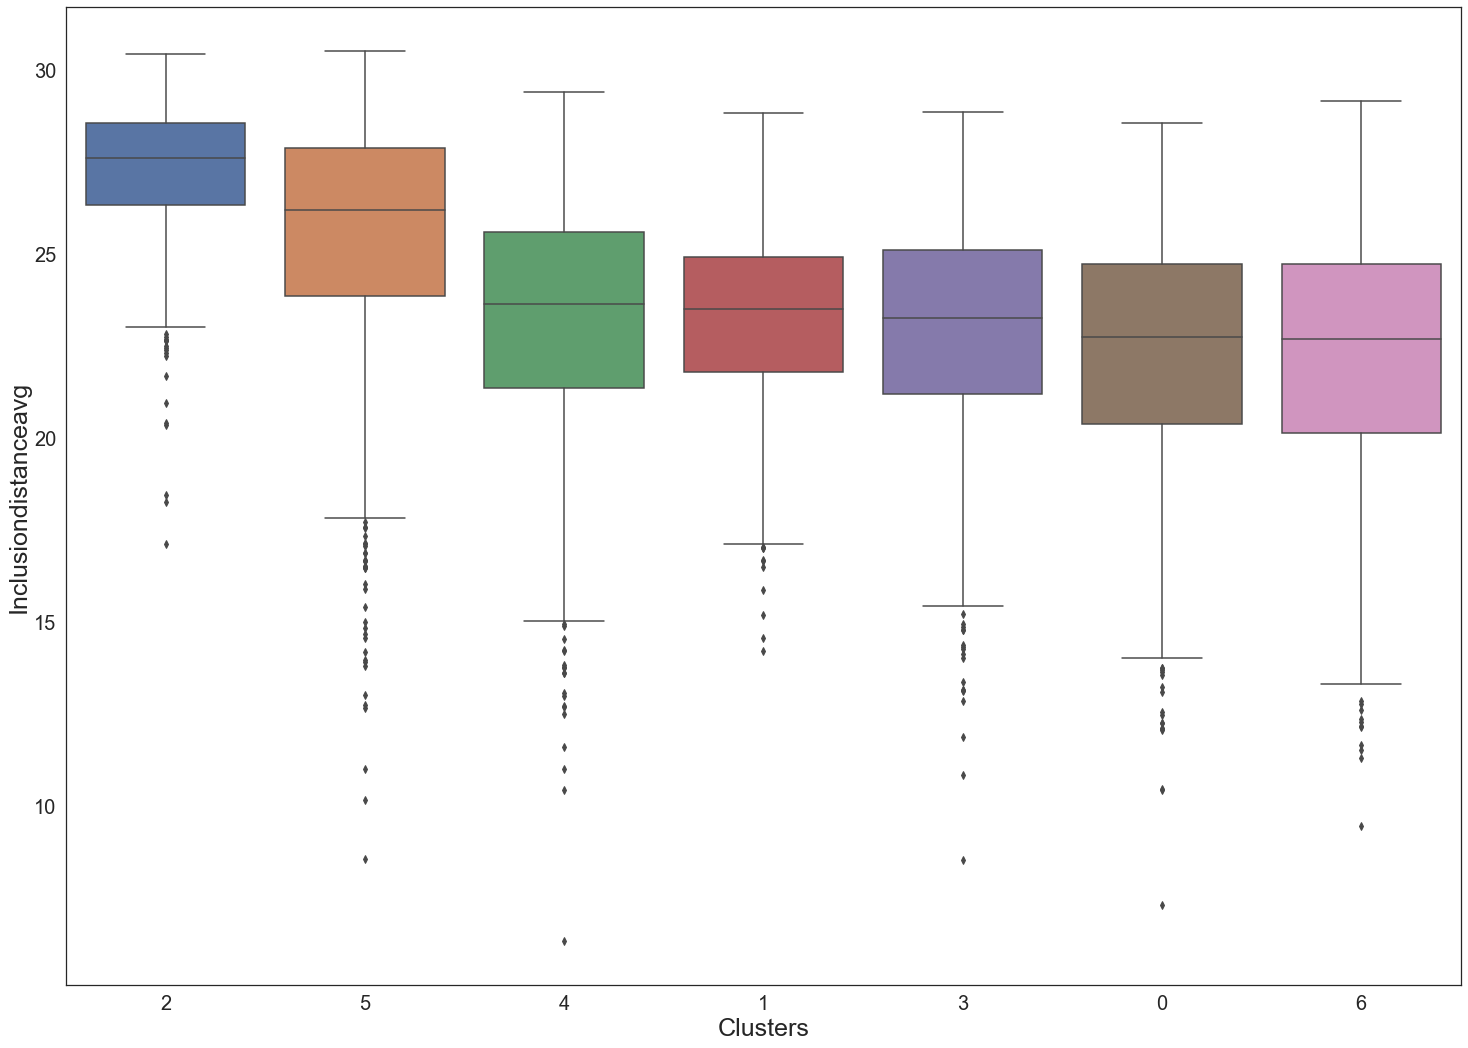

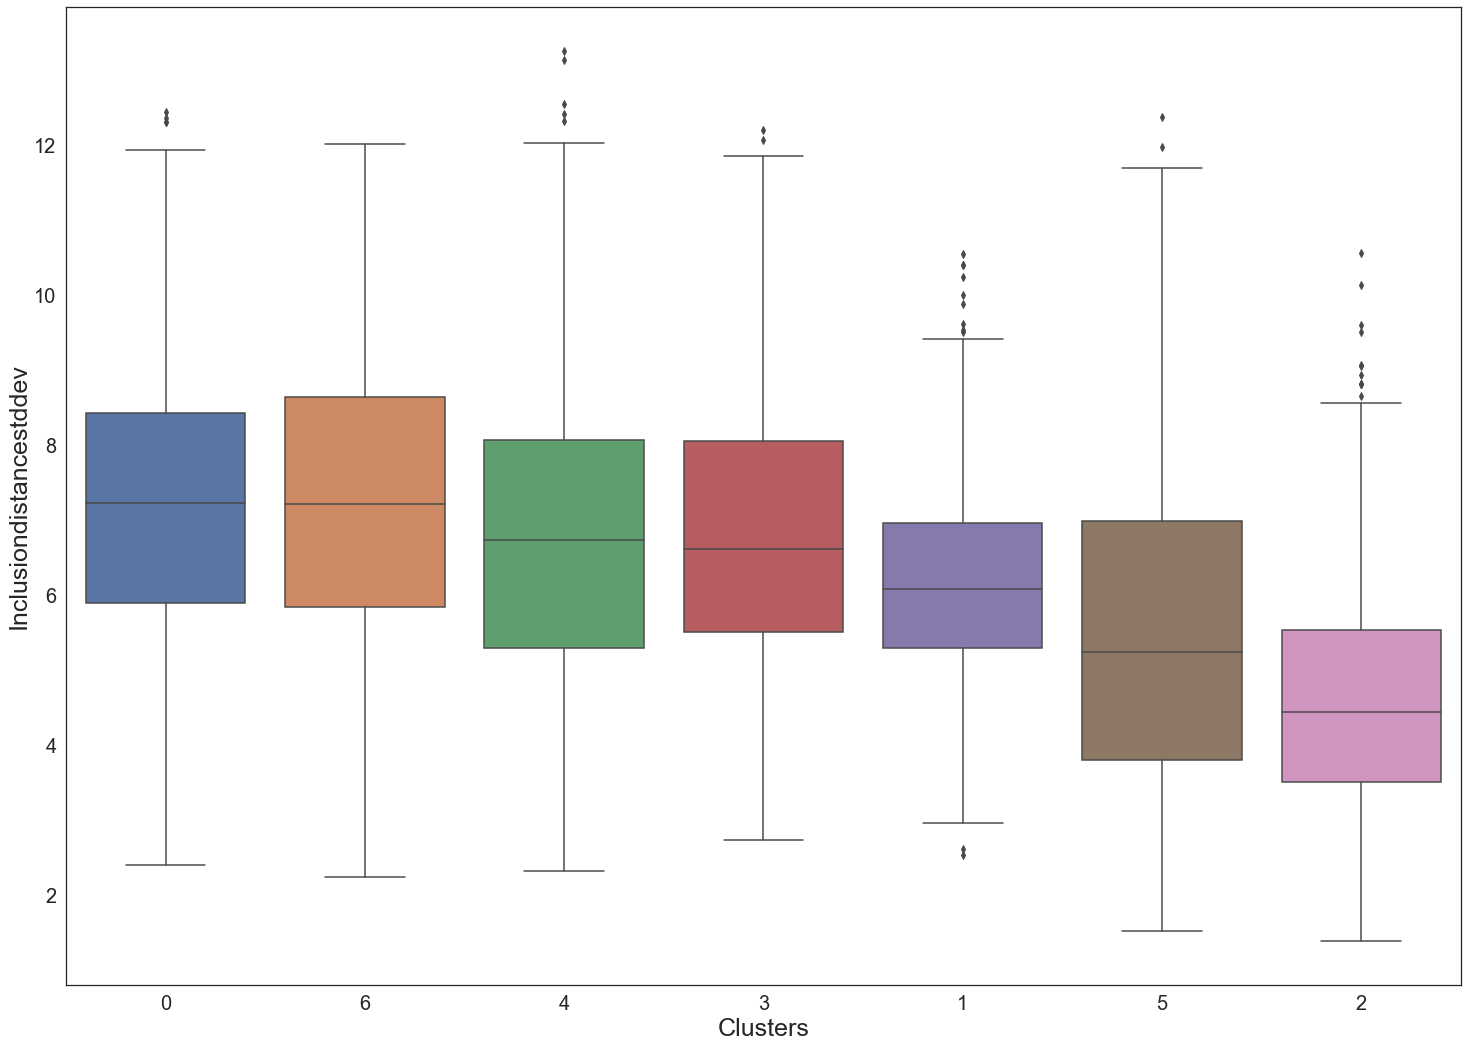

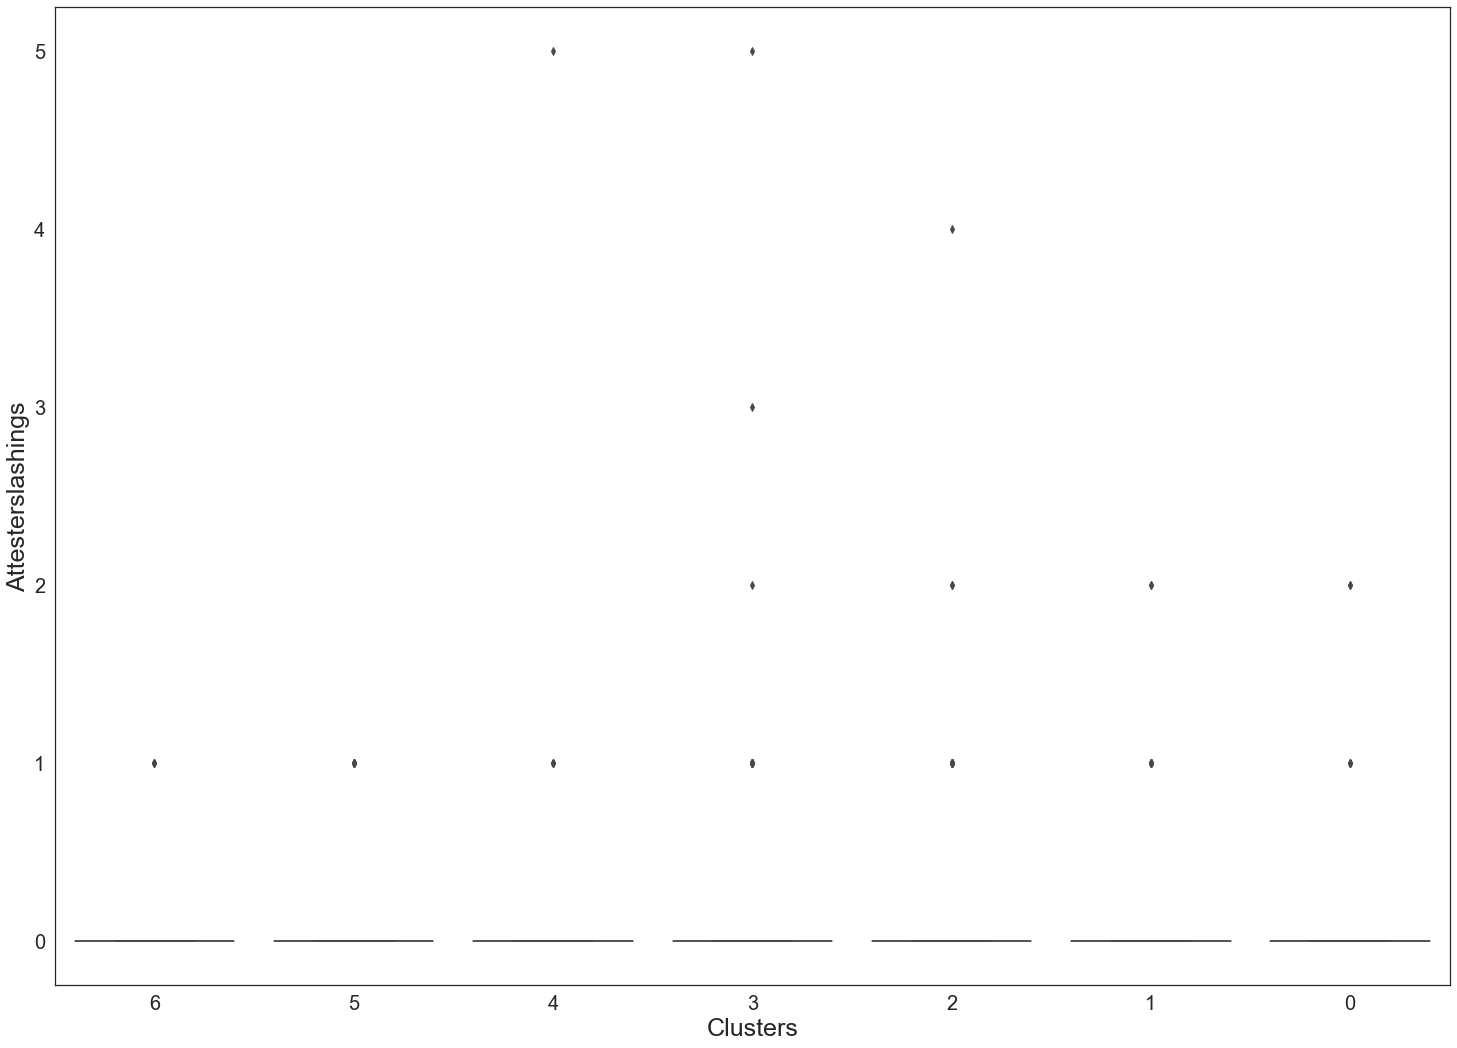

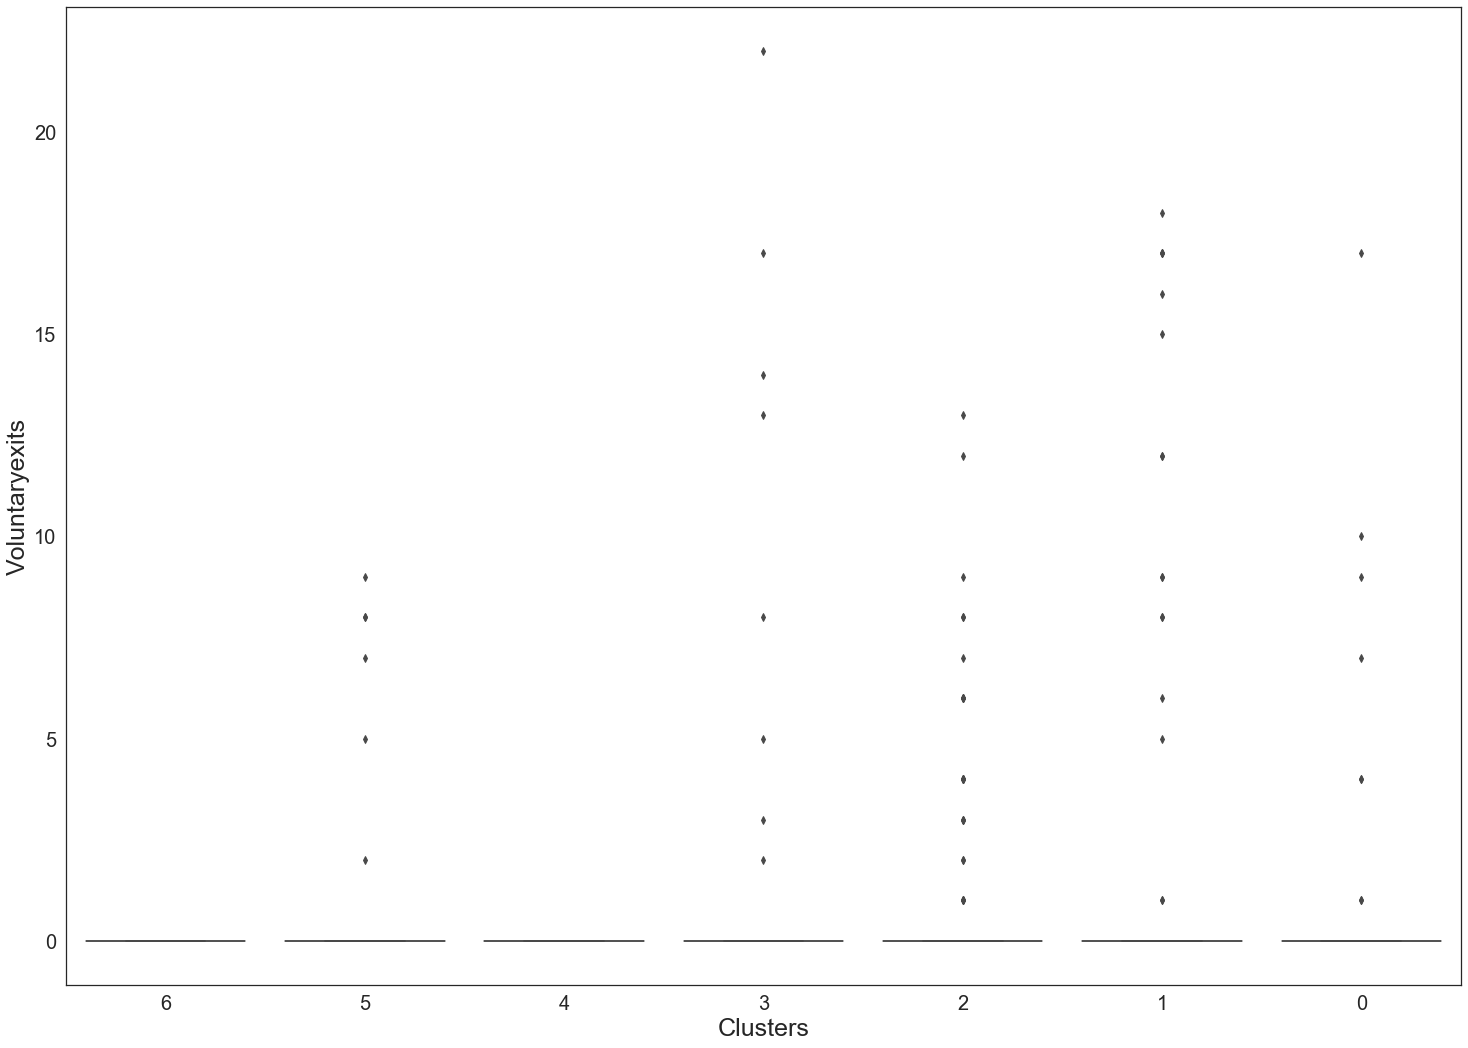

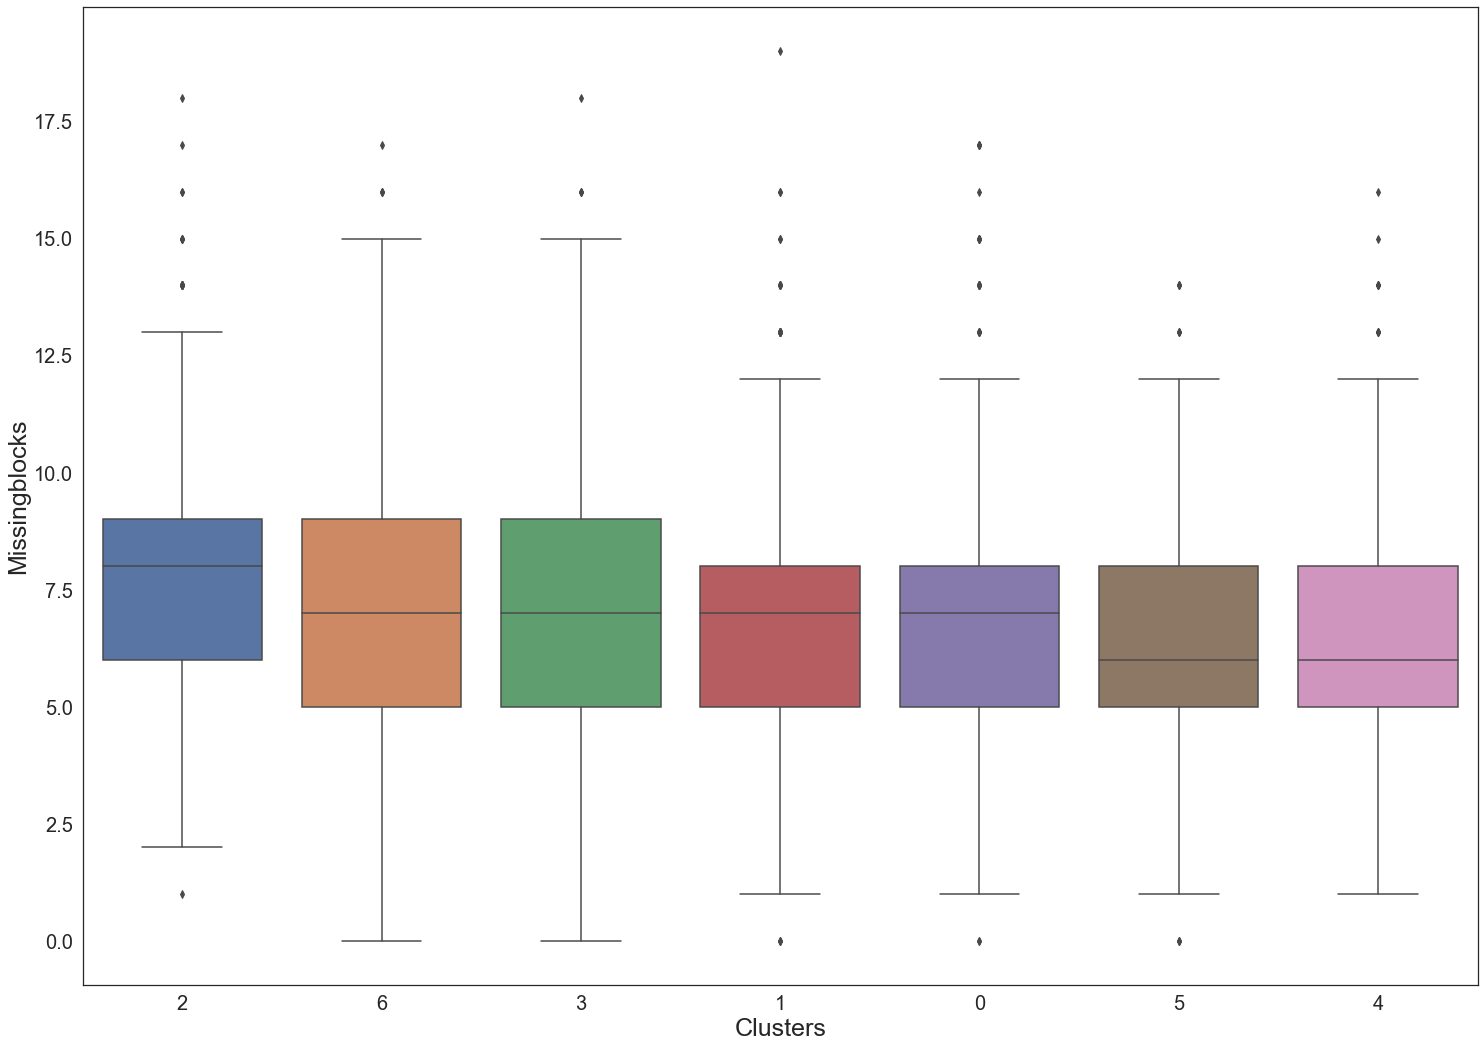

In [422]:
# Box plots!
sns.set_style(style='white')

for i, df in enumerate(dfs):
    plt.figure(figsize=(25,18))
    a = sns.boxplot(x=df.columns[1], y=df.columns[0], data=df, order=median_per_cluster_dfs[i].index)
    a.set_xlabel(df.columns[1].capitalize() ,fontsize=25)
    a.set_ylabel(df.columns[0].capitalize() ,fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'boxplots/boxplot_{df.columns[0]}_{df.columns[1]}.png')

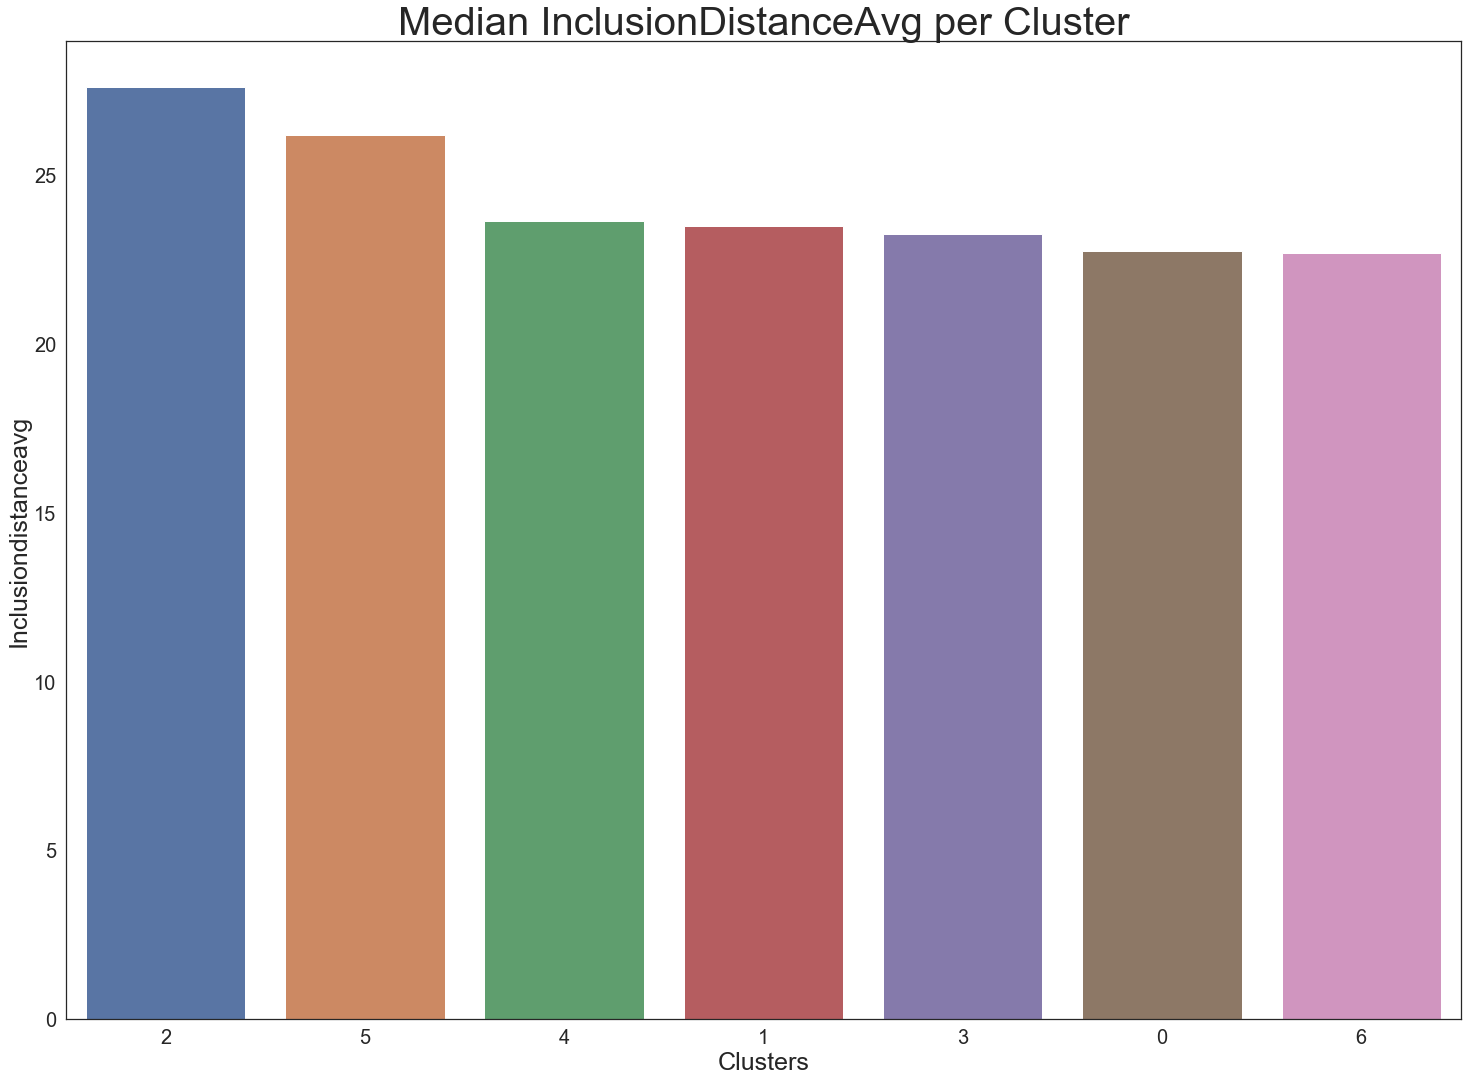

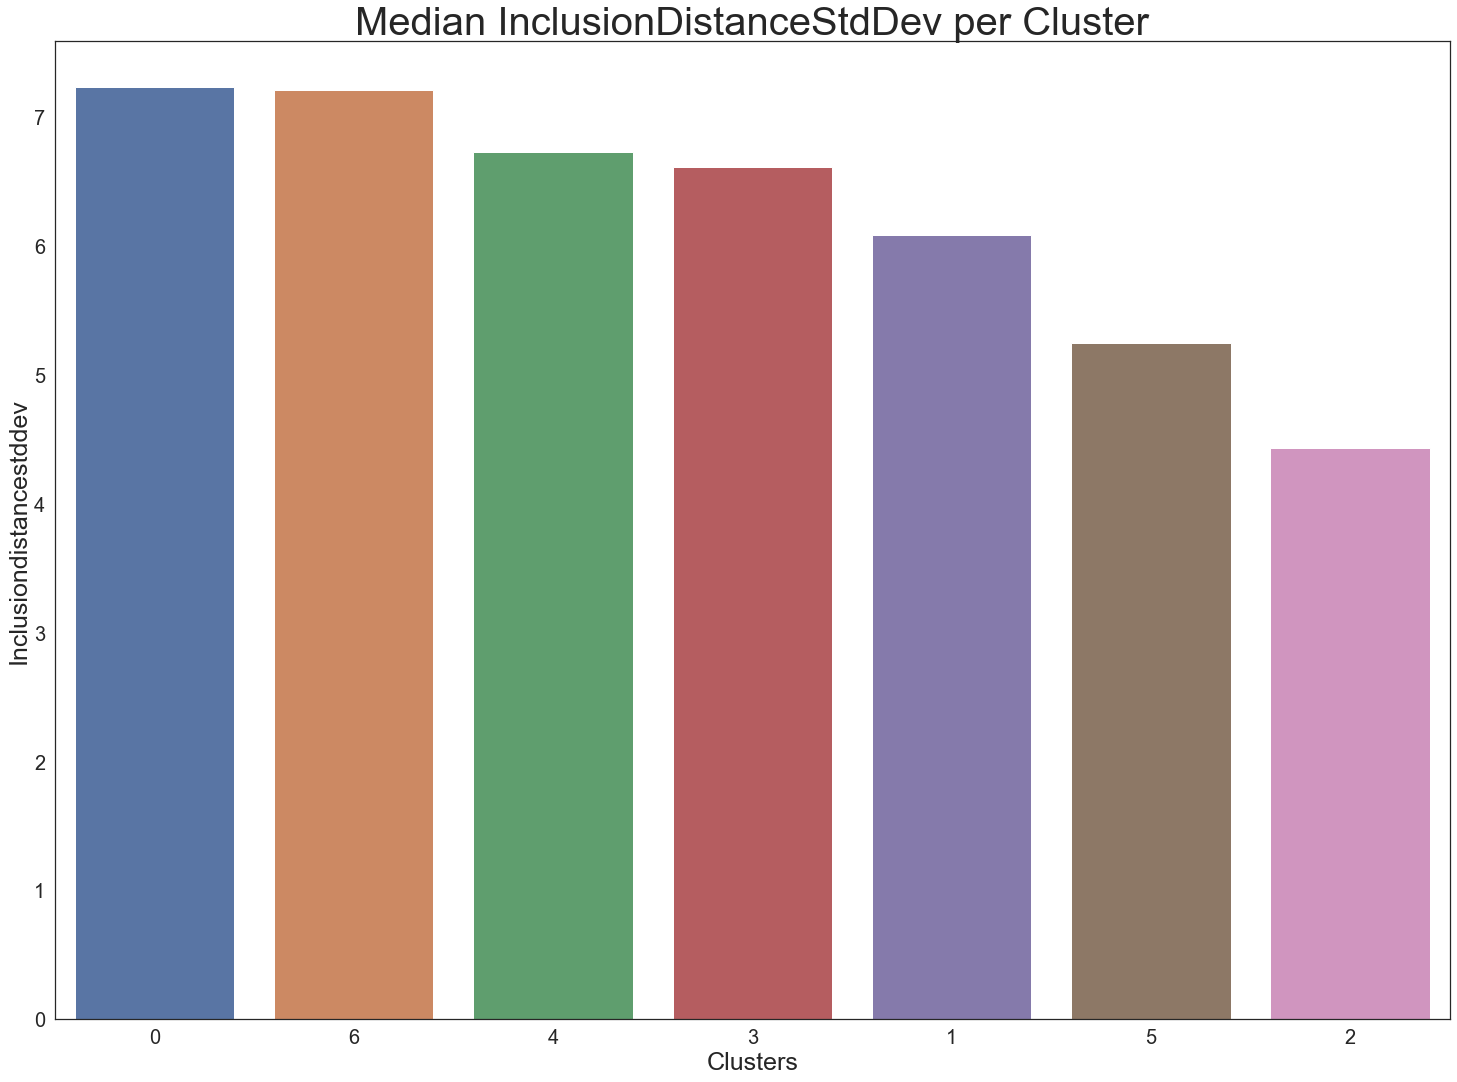

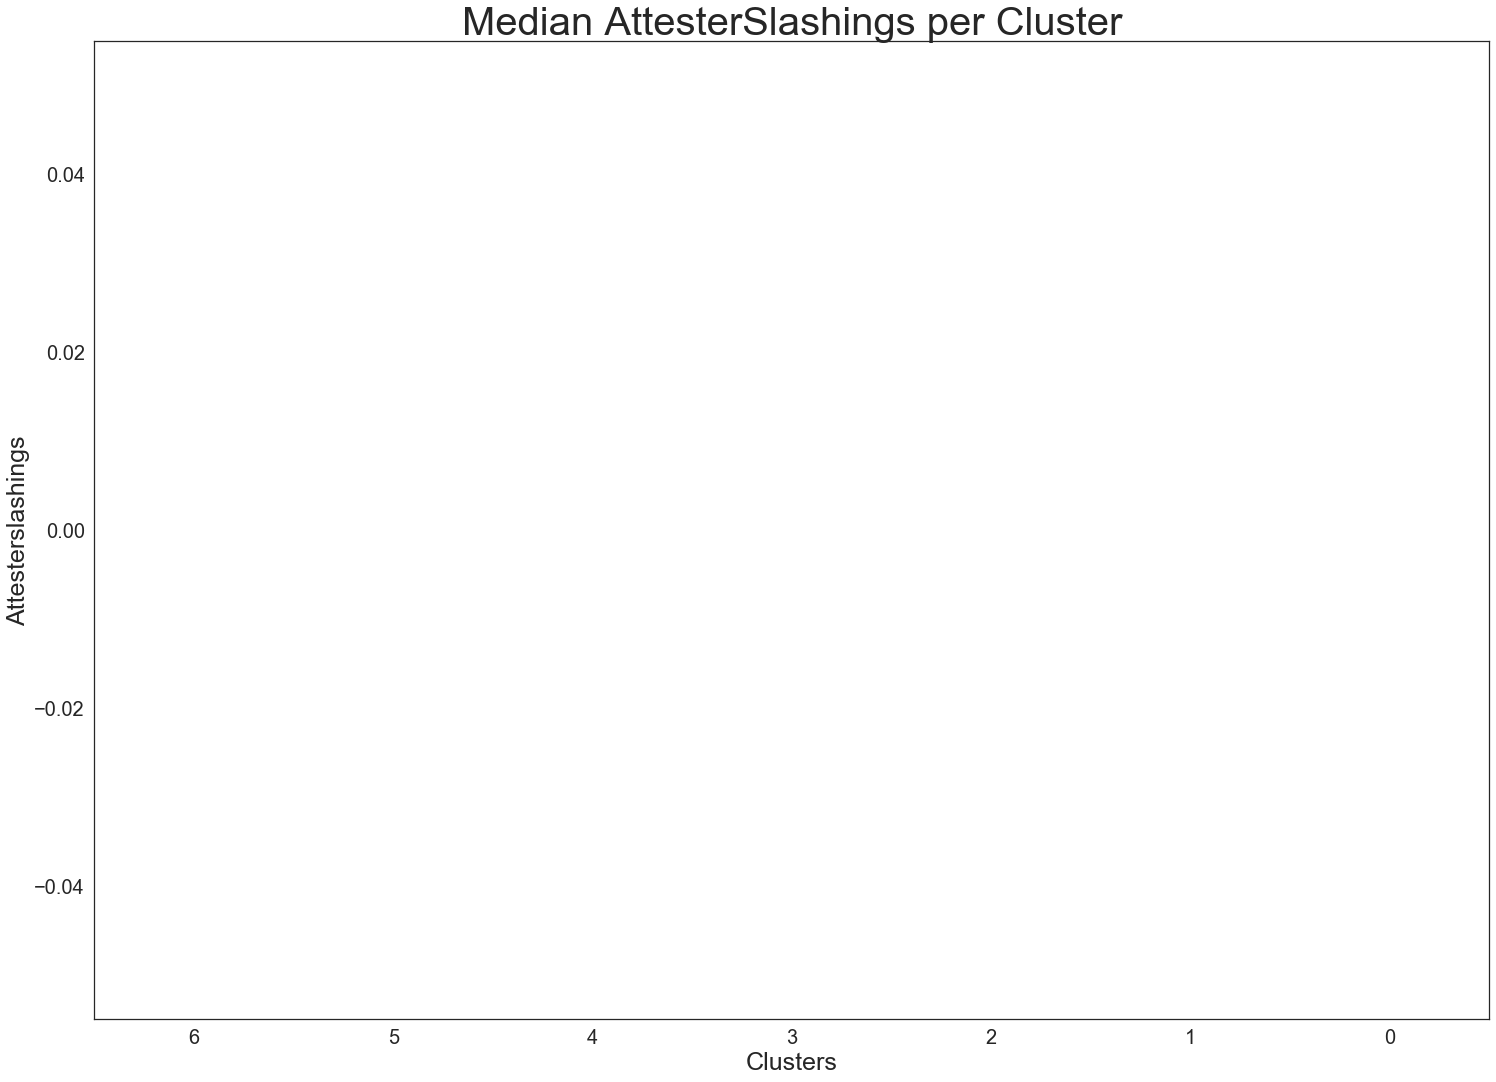

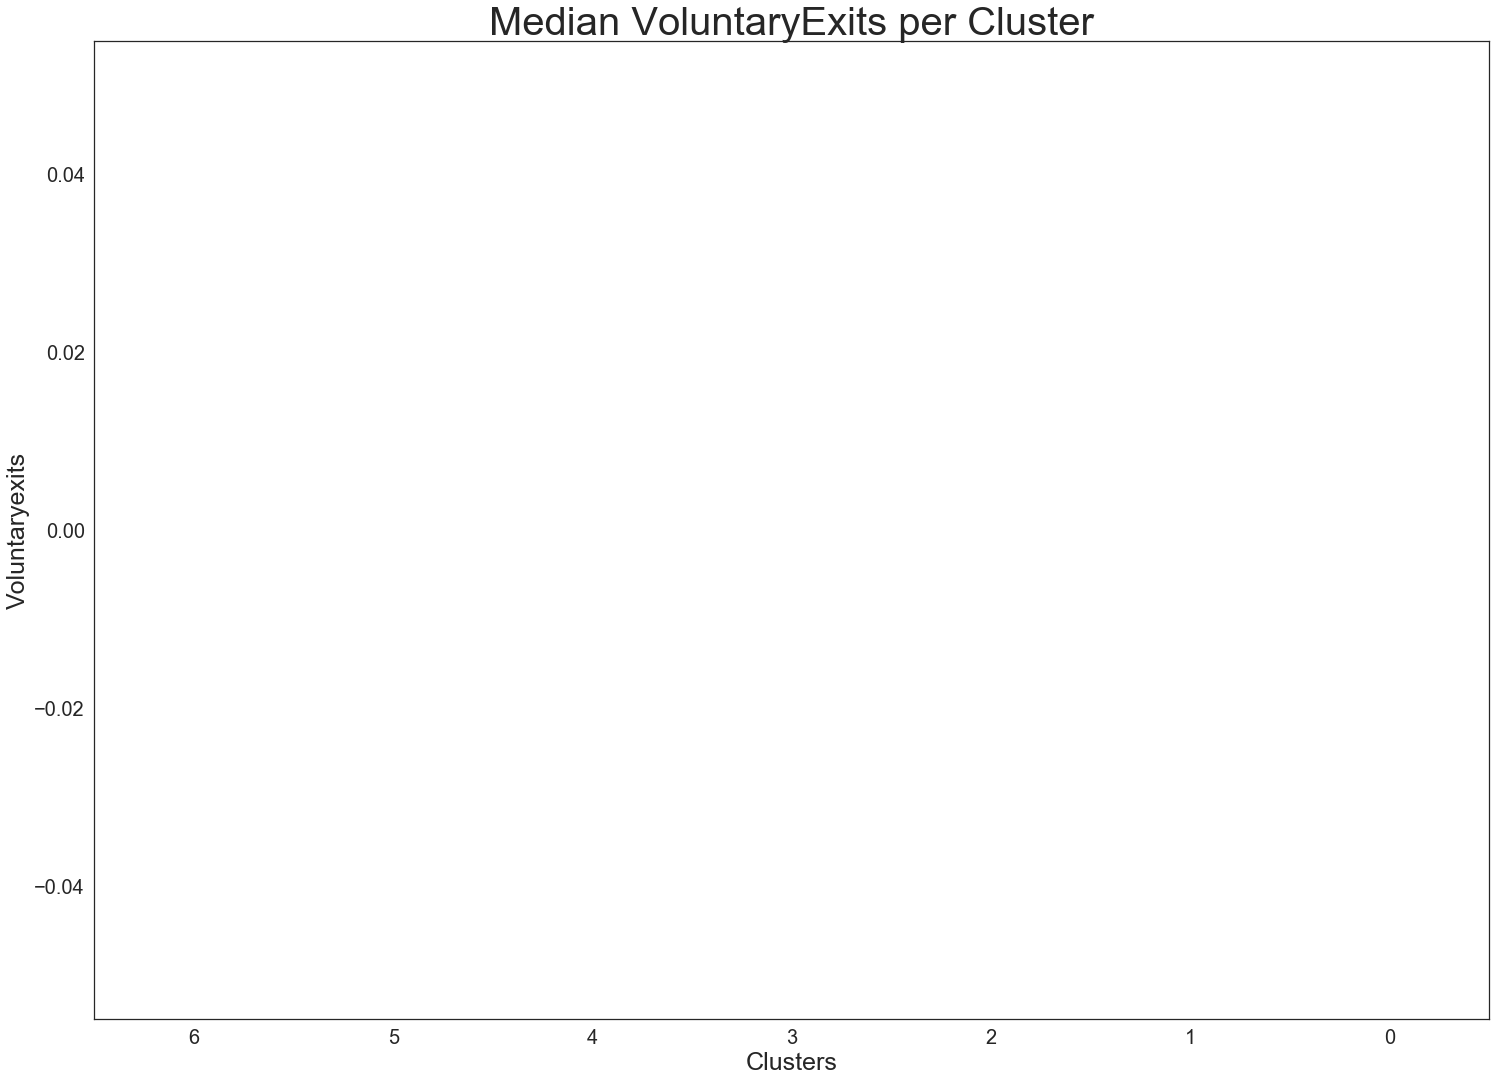

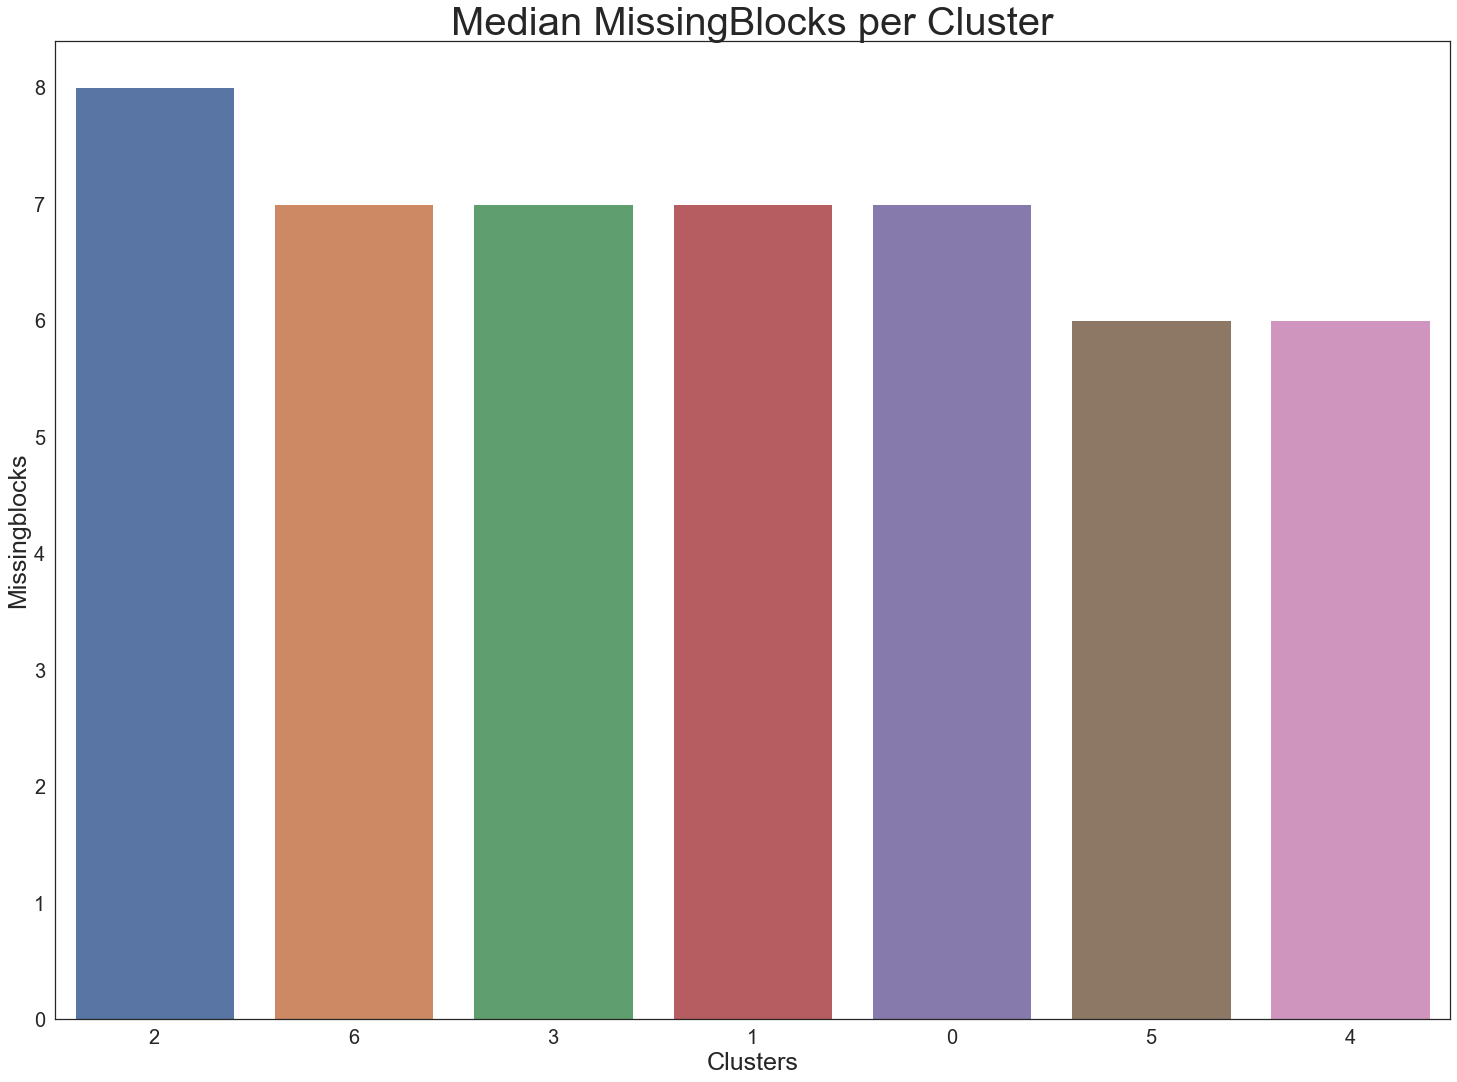

In [423]:
# Bar plots!
sns.set_style(style='white')

for i, df in enumerate(median_per_cluster_dfs):
    plt.figure(figsize=(25,18))
    a = sns.barplot(x=df.columns[0], y=df.columns[1], data=df, order=median_per_cluster_dfs[i].index)
    a.axes.set_title(f"Median {df.columns[1]} per Cluster",fontsize=40)
    a.set_xlabel(df.columns[0].capitalize() ,fontsize=25)
    a.set_ylabel(df.columns[1].capitalize() ,fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'barplots/barplot_median_{df.columns[0]}_{df.columns[1]}.png')

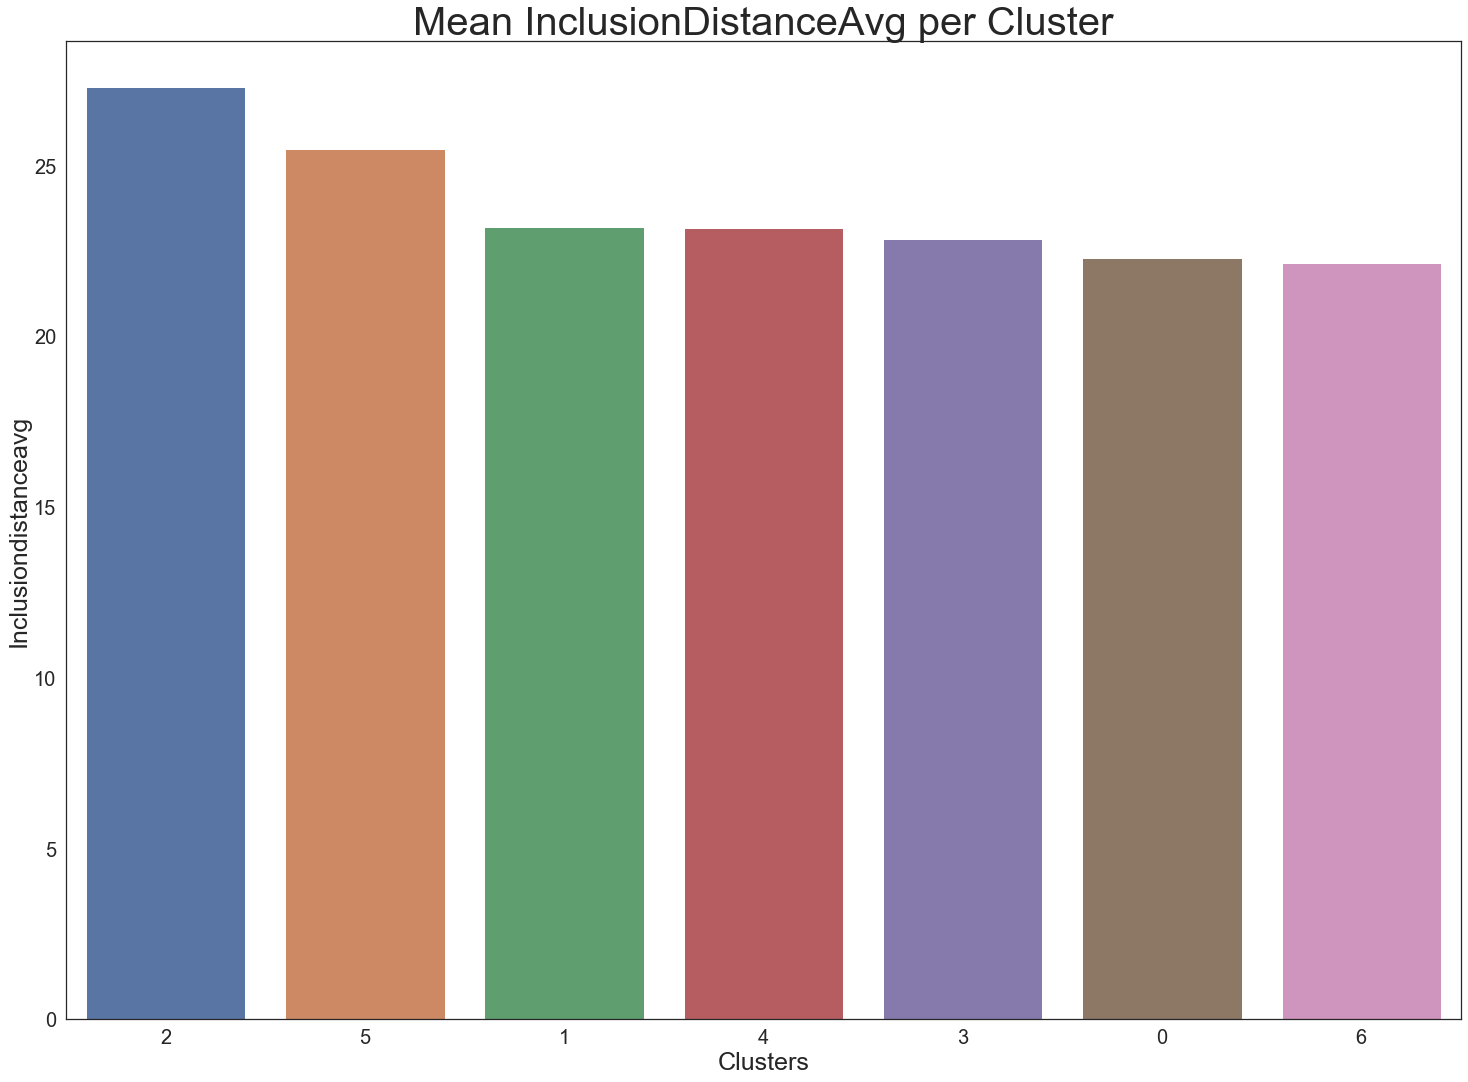

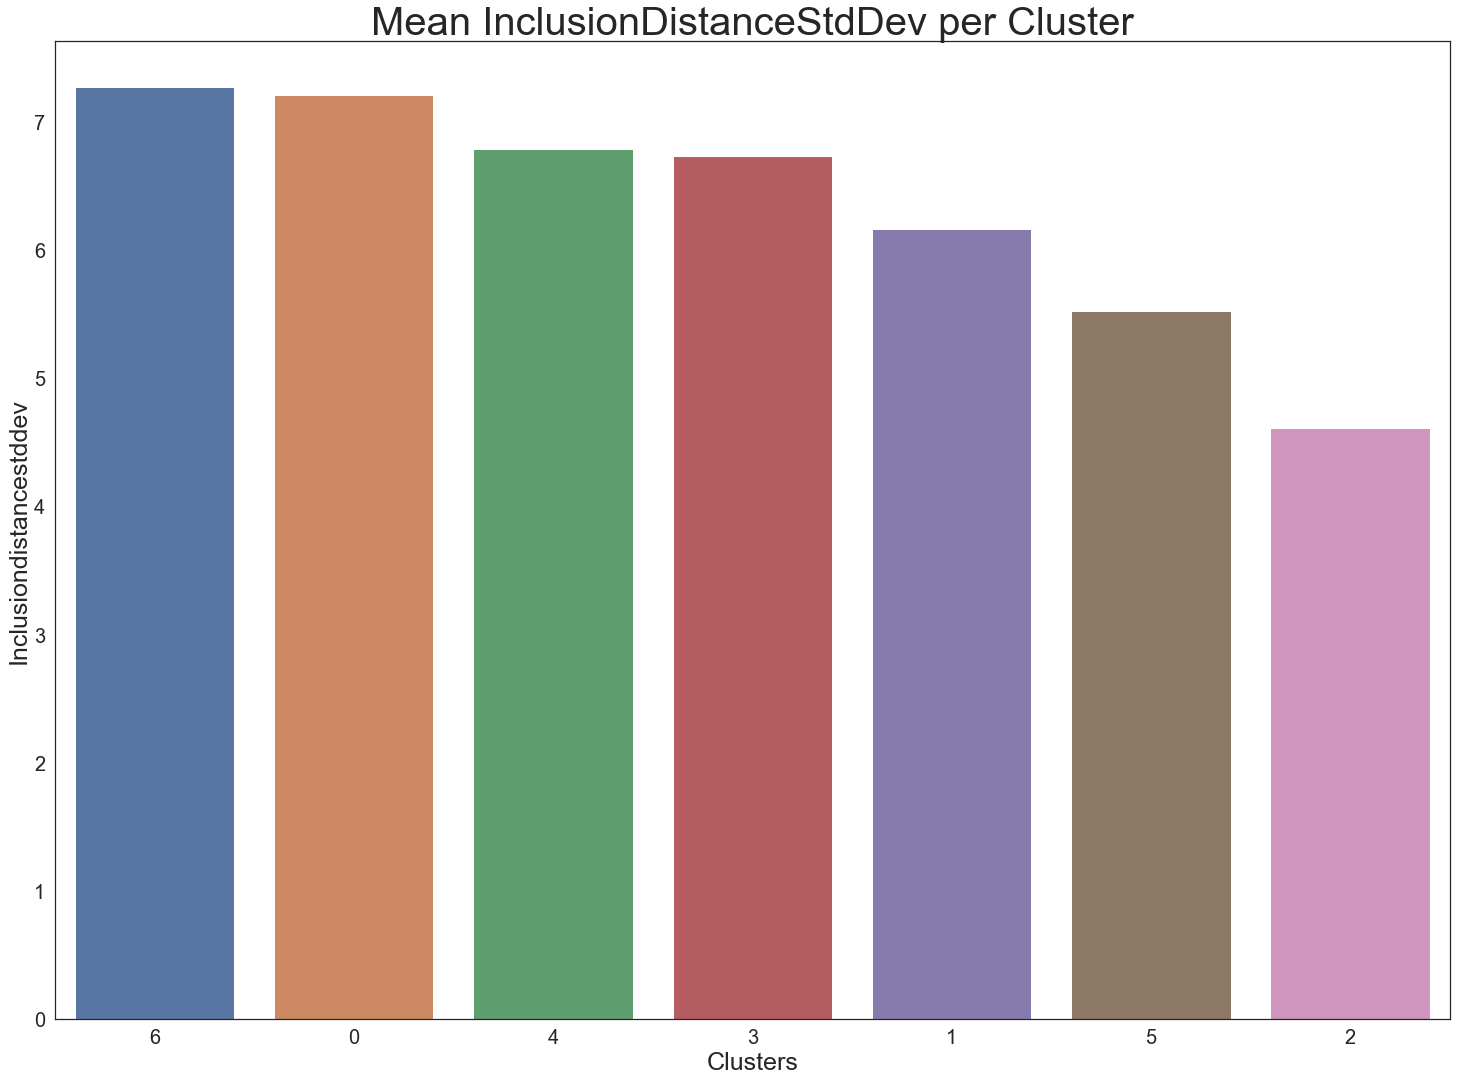

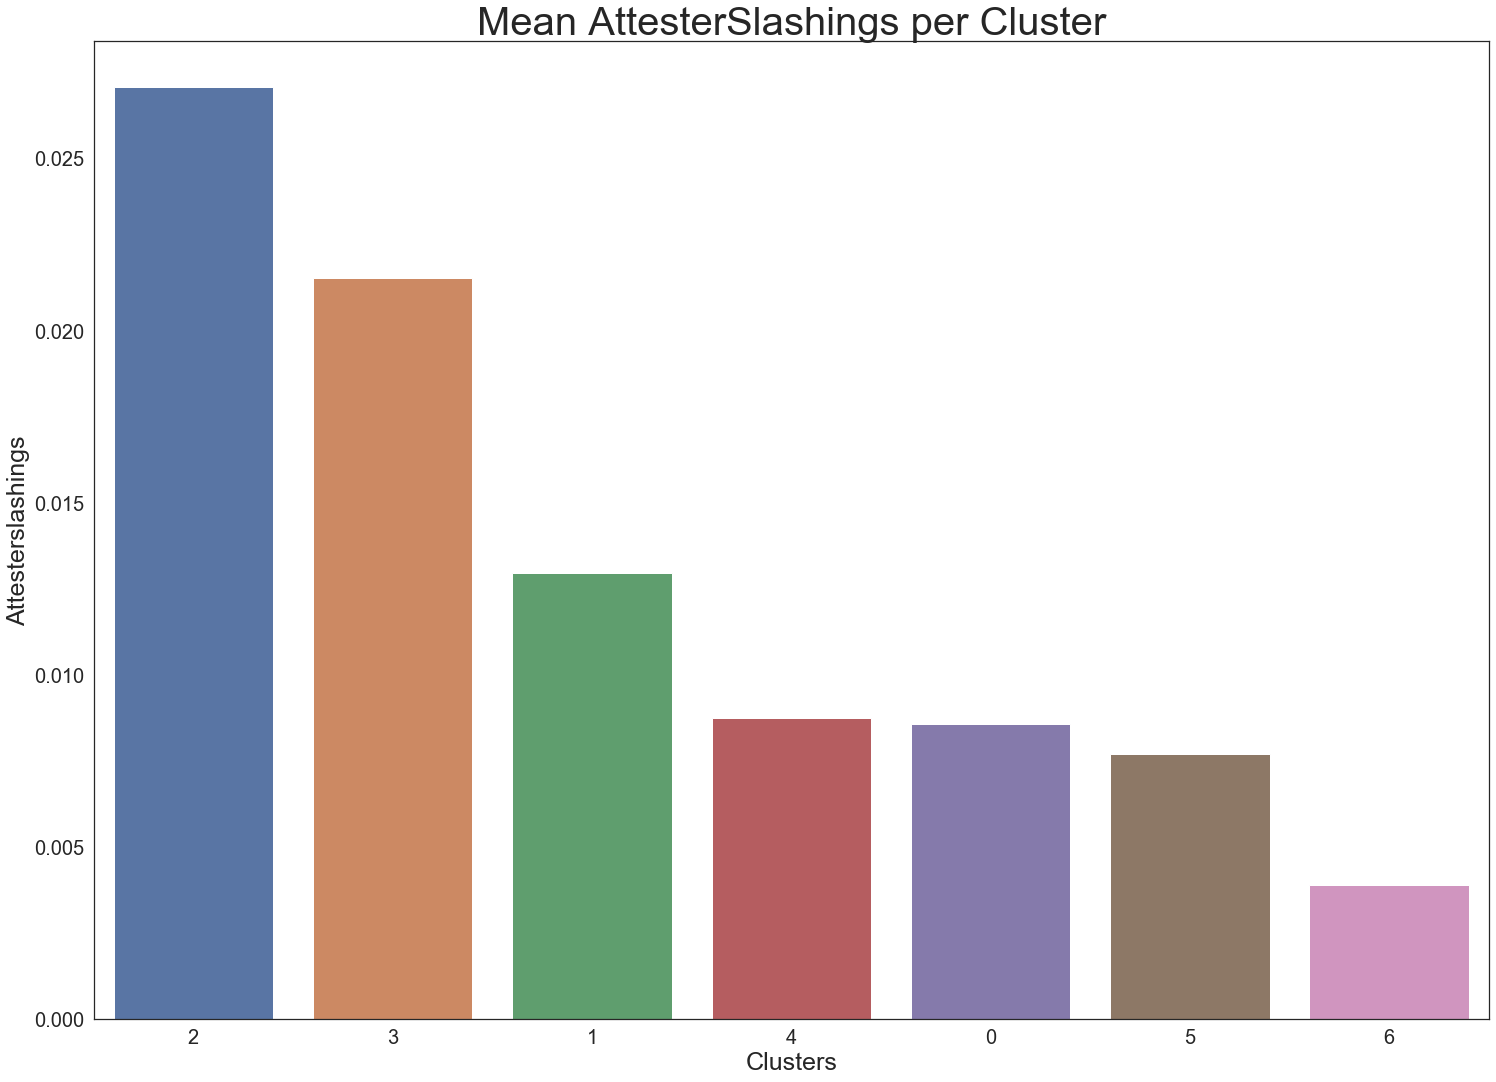

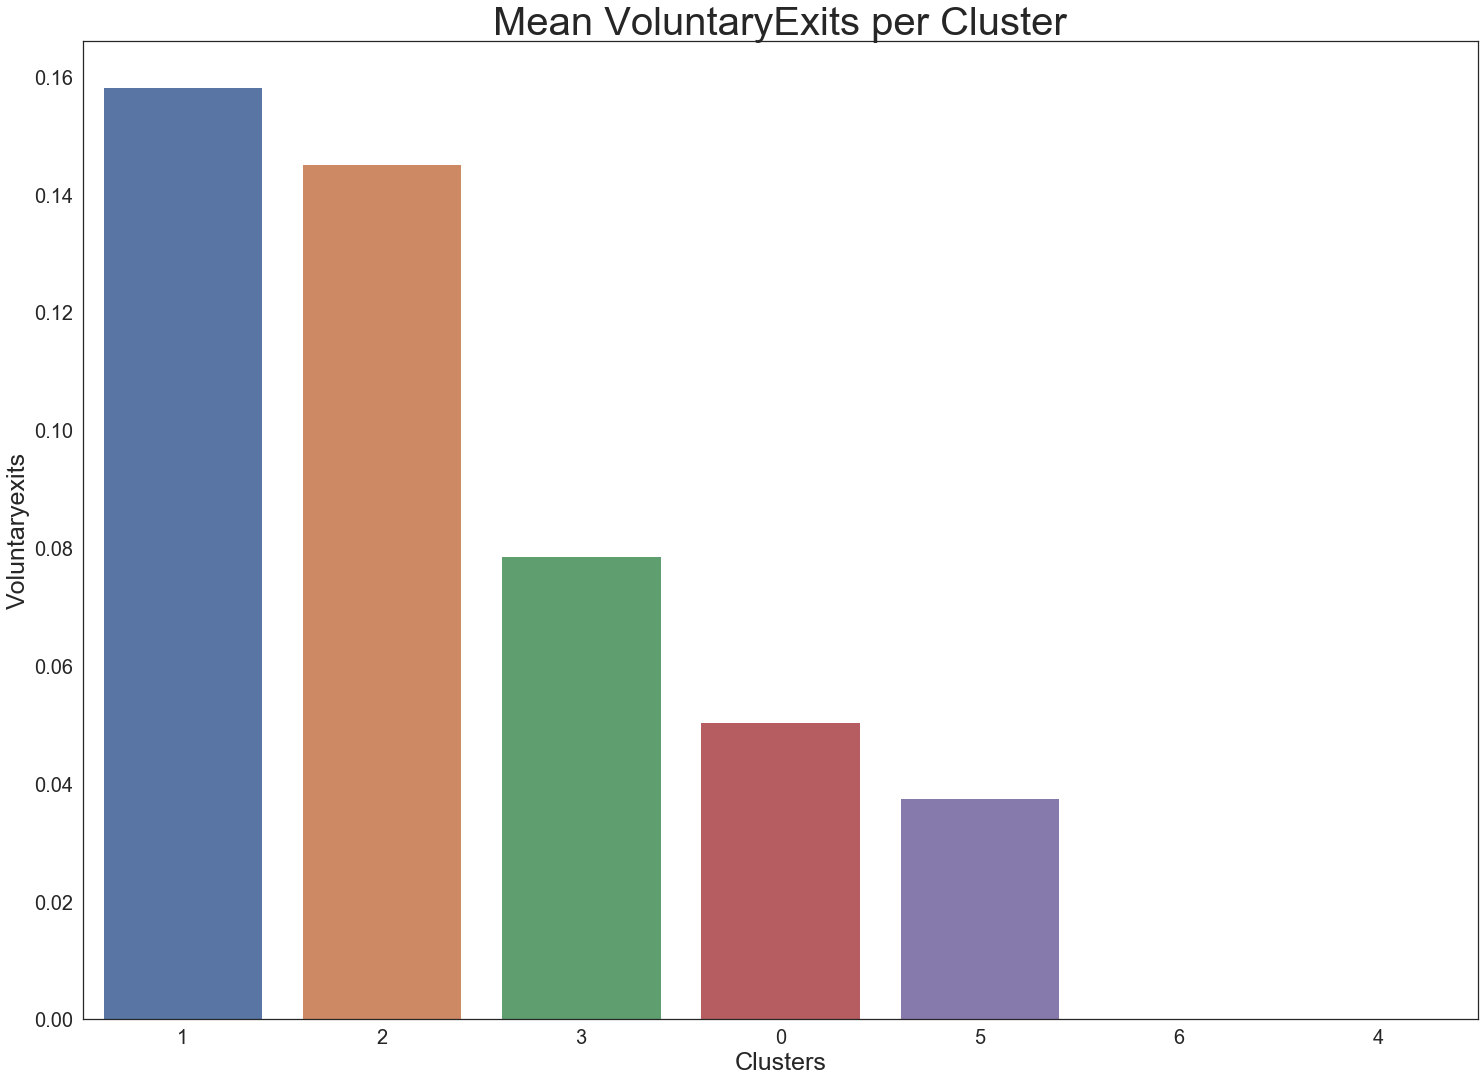

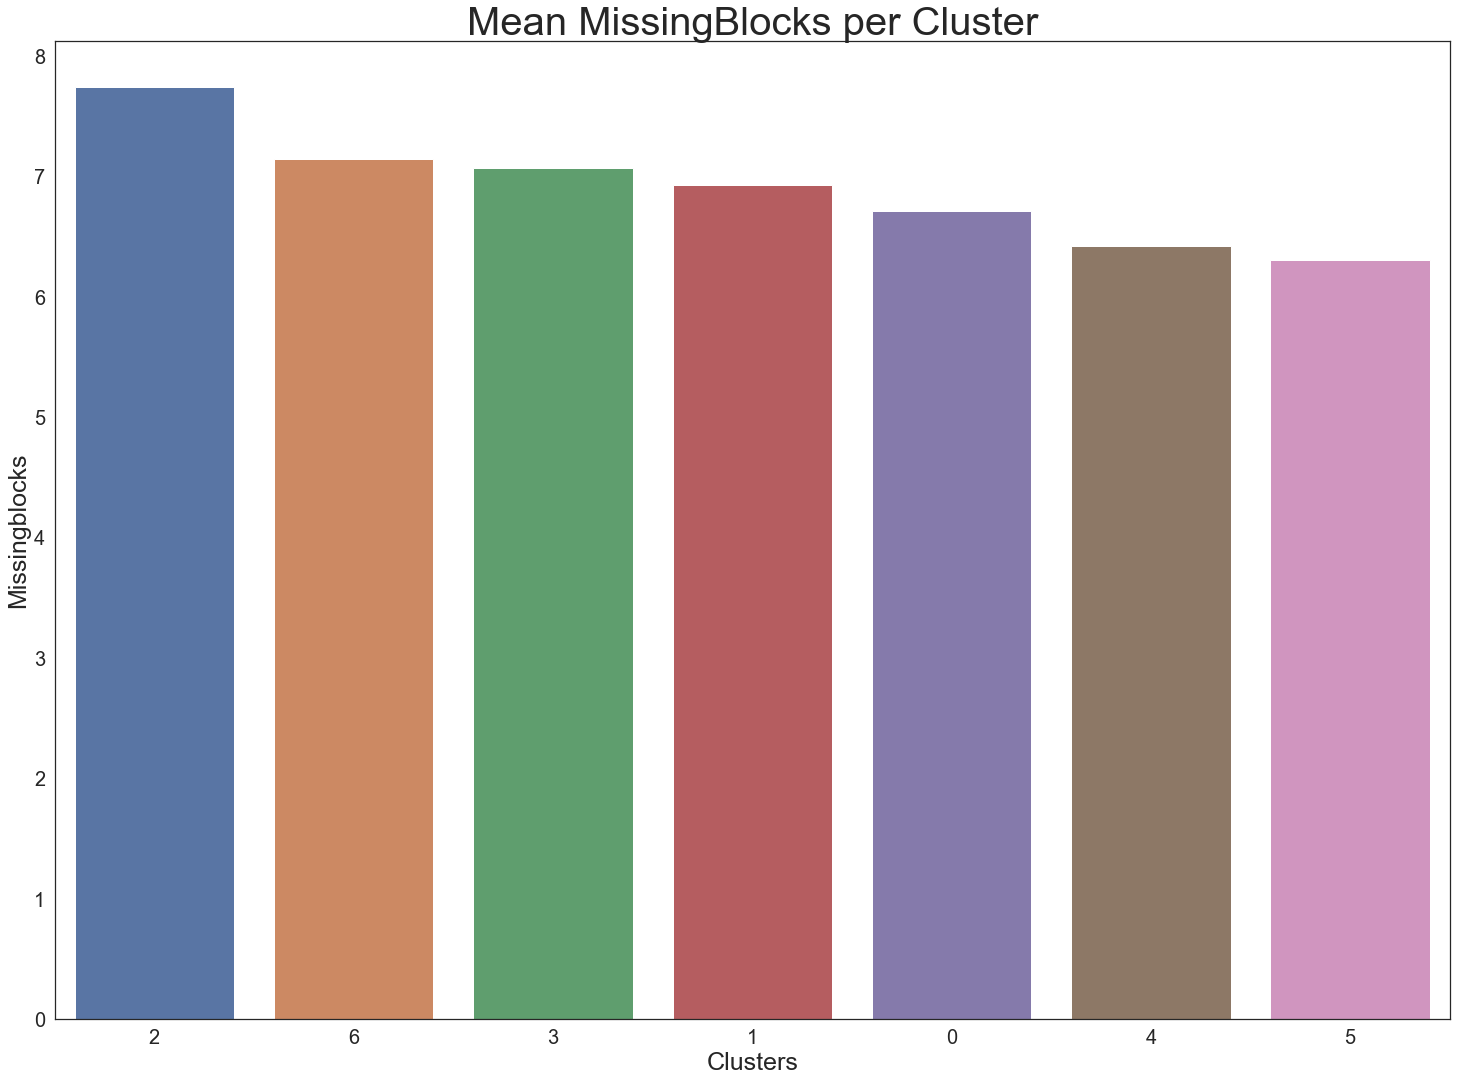

In [424]:
# Bar plots!
sns.set_style(style='white')

for i, df in enumerate(avgs_per_cluster_dfs):
    plt.figure(figsize=(25,18))
    a = sns.barplot(x=df.columns[0], y=df.columns[1], data=df, order=avgs_per_cluster_dfs[i].index)
    a.axes.set_title(f"Mean {df.columns[1]} per Cluster",fontsize=40)
    a.set_xlabel(df.columns[0].capitalize() ,fontsize=25)
    a.set_ylabel(df.columns[1].capitalize() ,fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'barplots/barplot_mean_{df.columns[0]}_{df.columns[1]}.png')

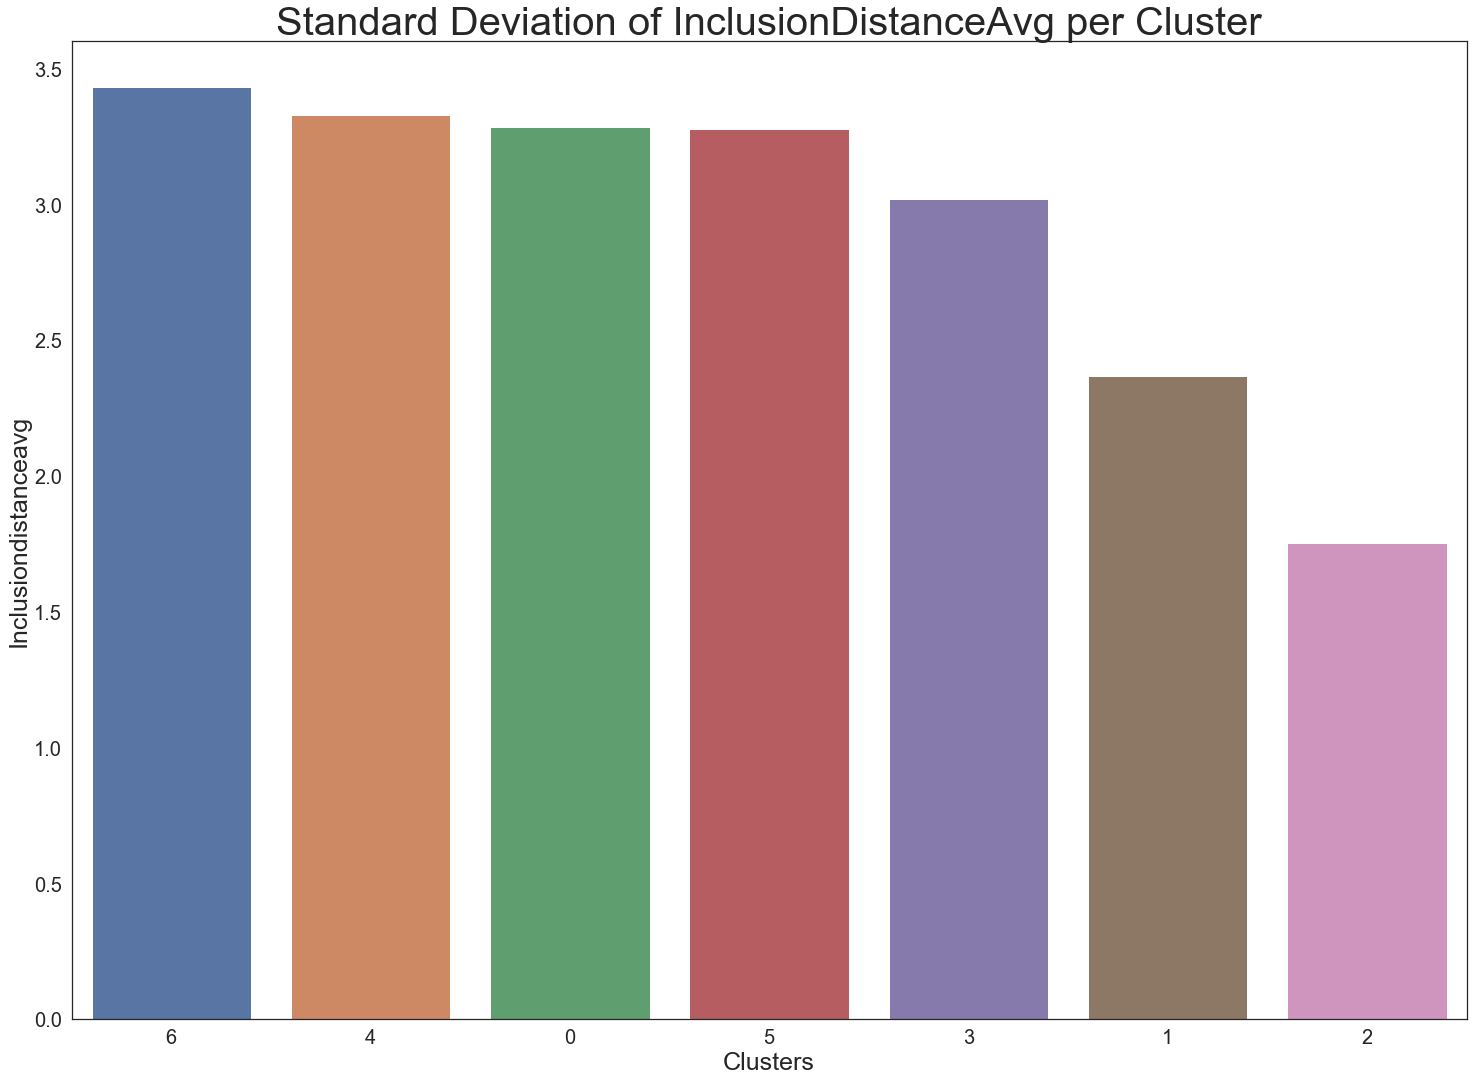

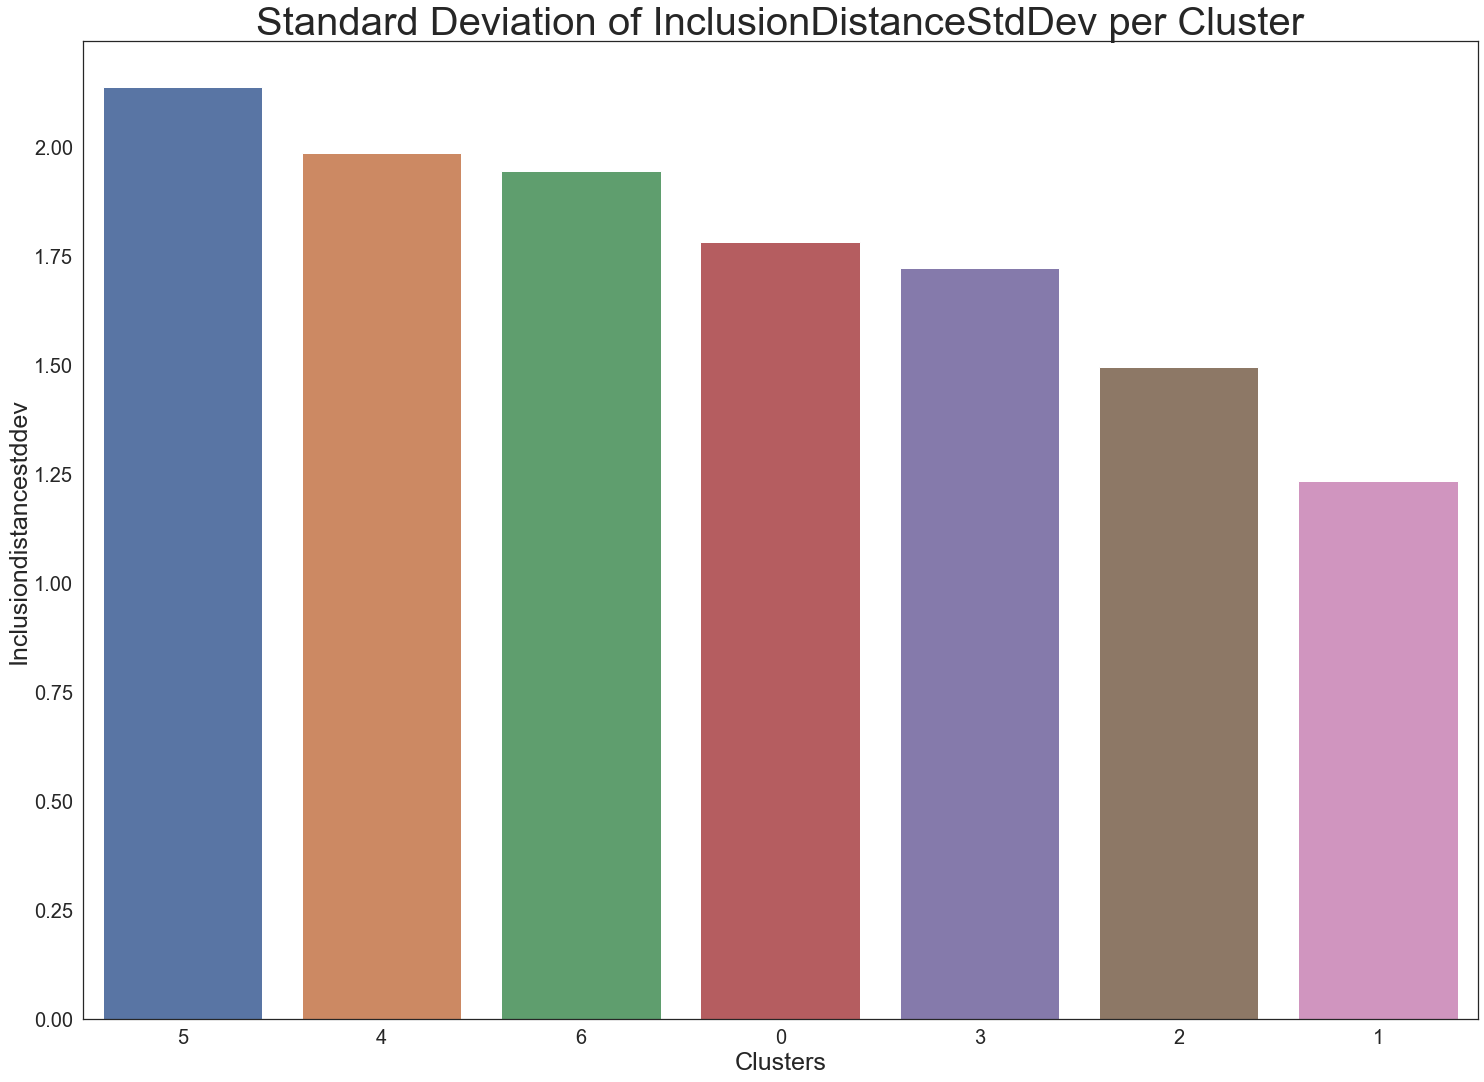

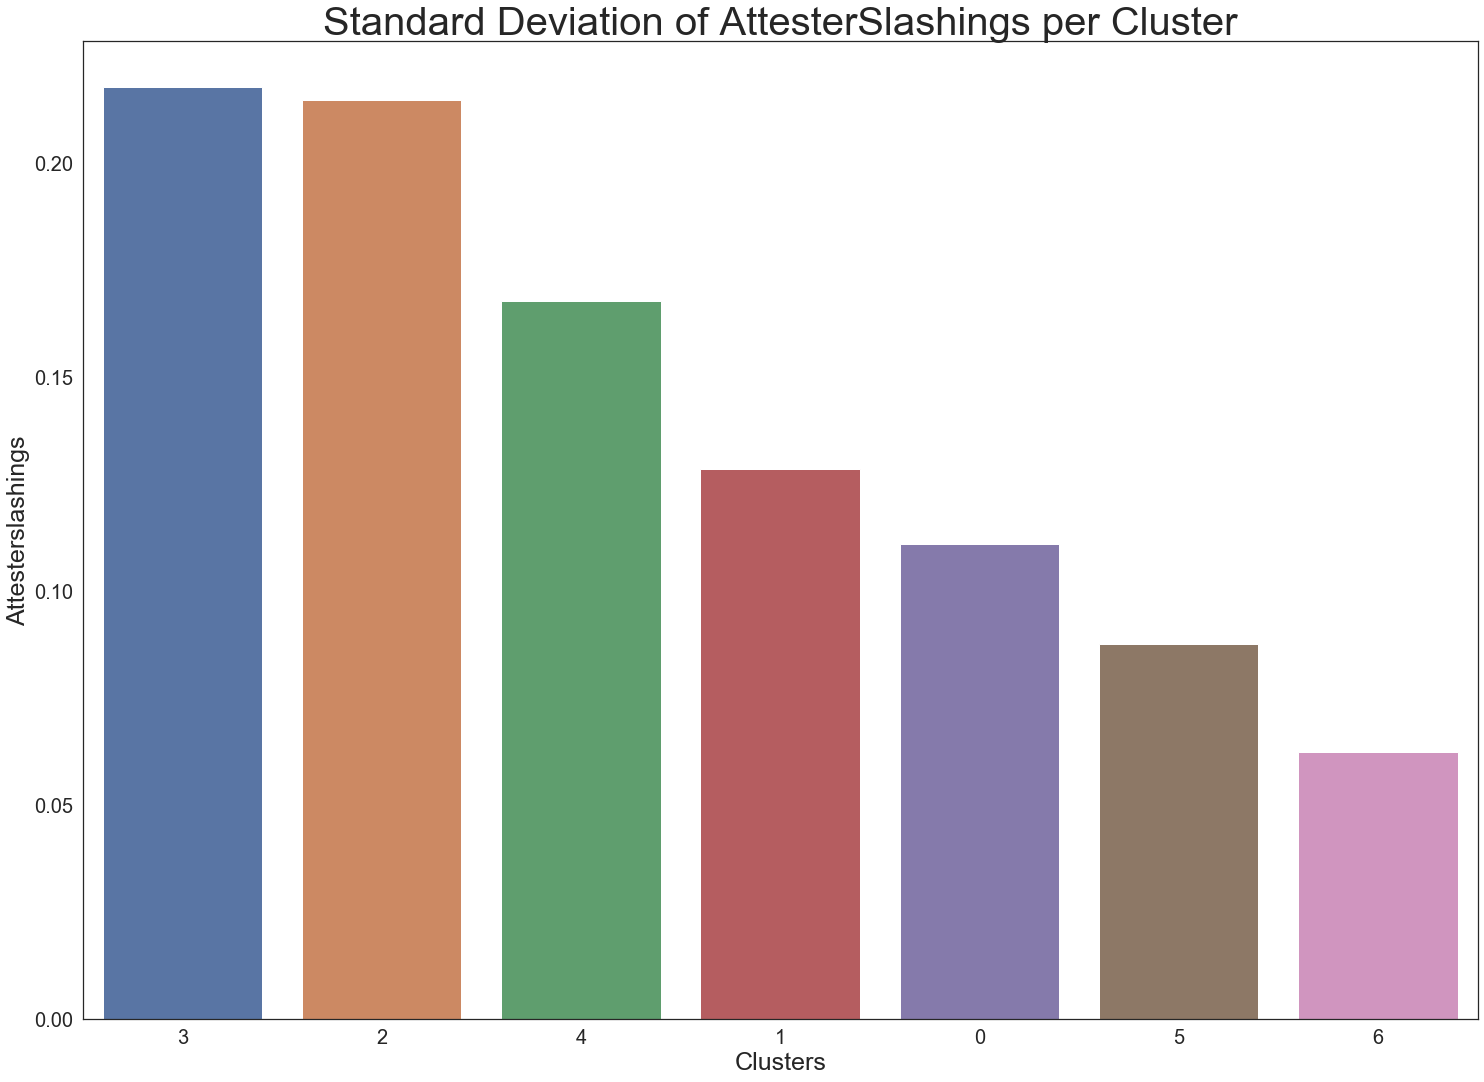

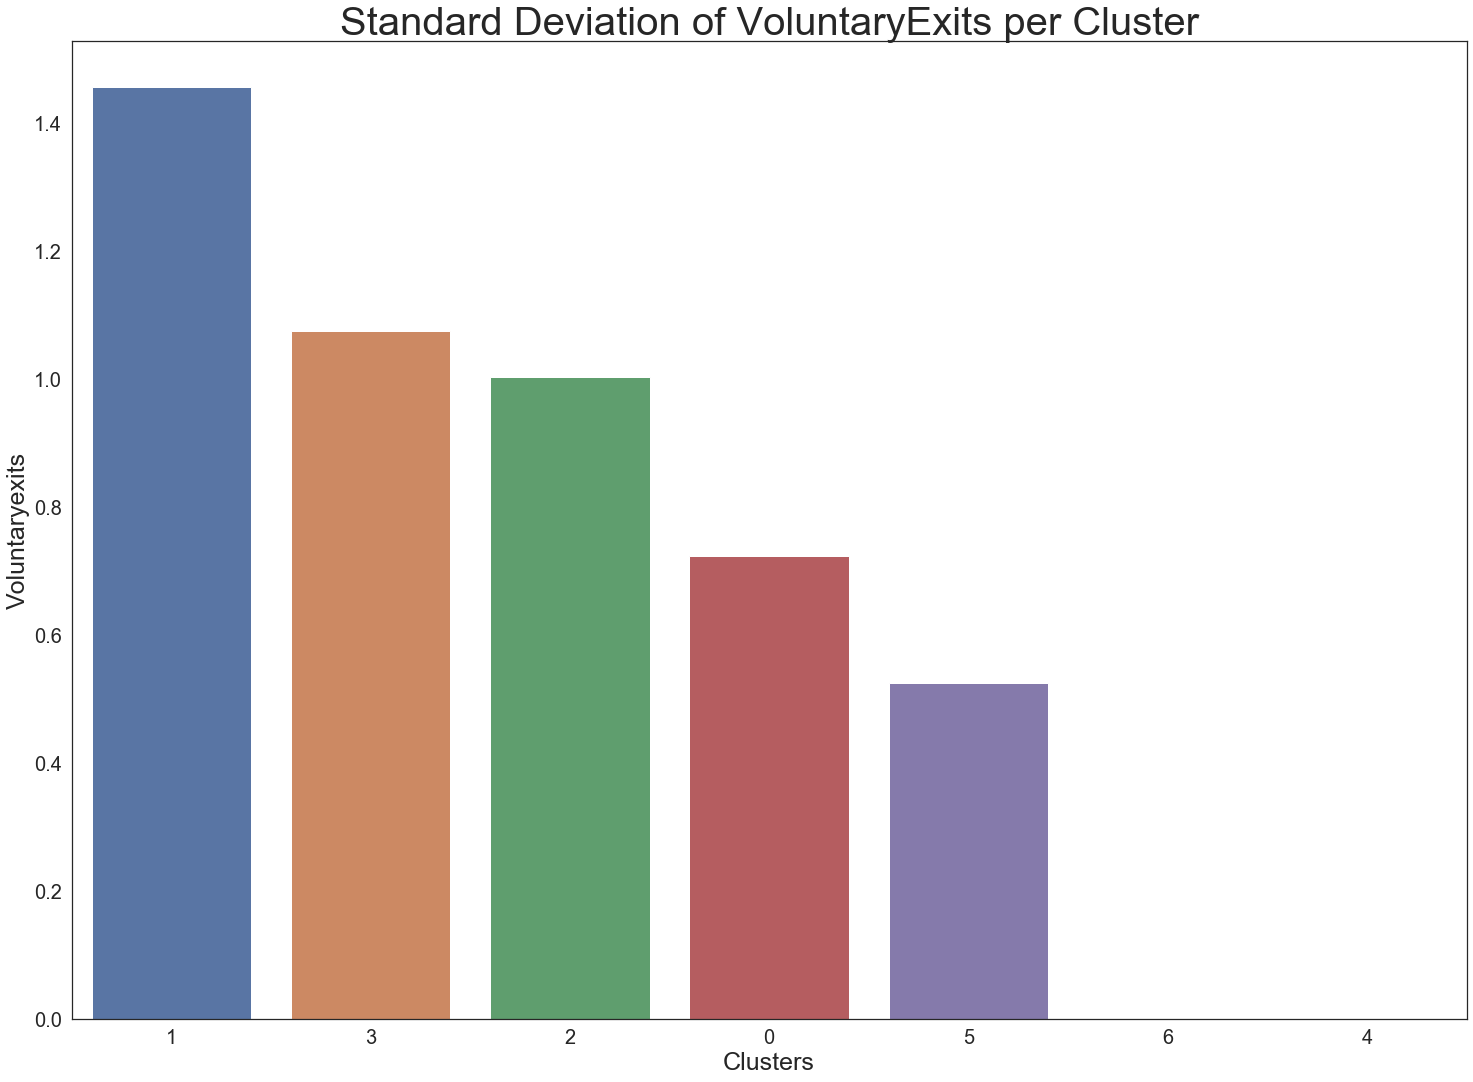

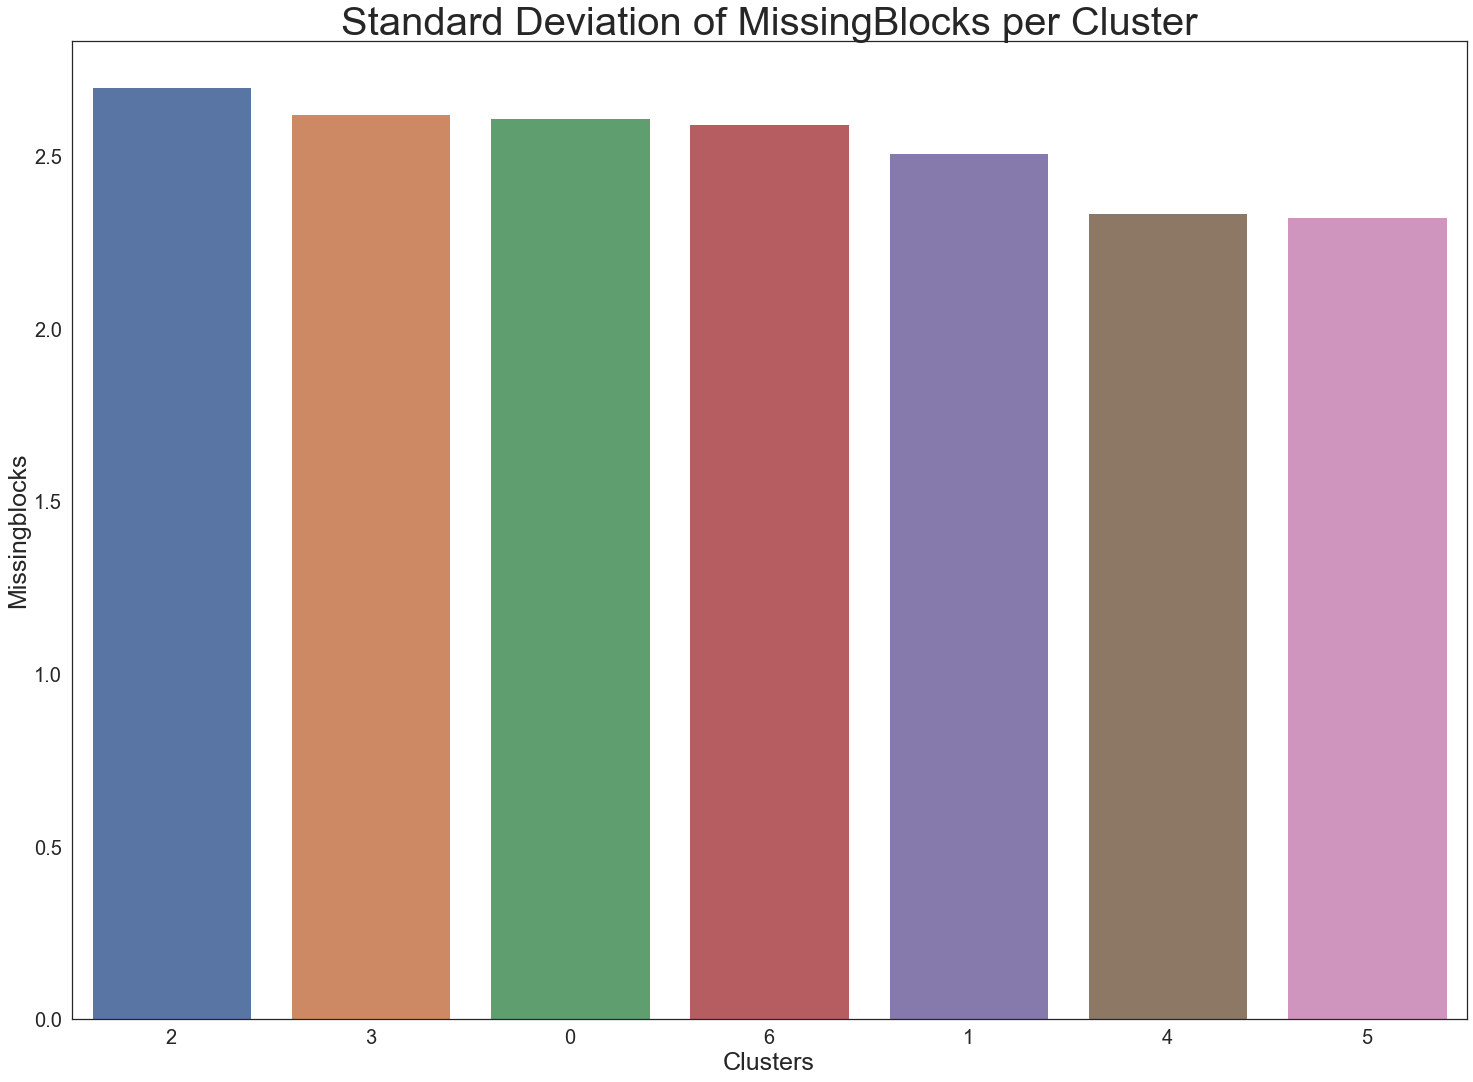

In [425]:
# Bar plots!
sns.set_style(style='white')

for i, df in enumerate(stdev_per_cluster_dfs):
    plt.figure(figsize=(25,18))
    a = sns.barplot(x=df.columns[0], y=df.columns[1], data=df, order=stdev_per_cluster_dfs[i].index)
    a.axes.set_title(f"Standard Deviation of {df.columns[1]} per Cluster",fontsize=40)
    a.set_xlabel(df.columns[0].capitalize() ,fontsize=25)
    a.set_ylabel(df.columns[1].capitalize() ,fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'barplots/barplot_stdev_{df.columns[0]}_{df.columns[1]}.png')